# Preprocessing

In [ ]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform, cdist

GLOBAL_MIN = 0.45
GLOBAL_MAX = 2.2

def create_rp(exclude_cols, baseline, file_path):
  label = ''

  if file_path.endswith('.csv'):
    df = pd.read_csv(file_path)
    if 'good' in file_path:
        df['Label'] = 'good'
        label = 'good'
    elif 'bad' in file_path:
      if 'left' in file_path:
        df['Label'] = 'bad_left'
        label = 'bad_left'
      elif 'right' in file_path:
        df['Label'] = 'bad_right'
        label = 'bad_right'
      elif 'front' in file_path:
        df['Label'] = 'bad_front'
        label = 'bad_front'
      elif 'back' in file_path:
        df['Label'] = 'bad_back'
        label = 'bad_back'
      else:
        df['Label'] = 'bad'
        label = 'bad'
        print("this is file_name:", file_path)
    else:
        df['Label'] = 'unknown'  # ?
        label = 'unknown'
    #df is the dataframe from the csv file

    # Find the index of the first row where any sensor value exceeds the baseline
    baseline_idx = df[(df[['F0 (V)', 'F1 (V)', 'F2 (V)', 'F3 (V)', 'F4 (V)', 'F5 (V)', 'F6 (V)', 'F7 (V)']] > baseline).any(axis=1)].index[0]

    # Slice the DataFrame from that index onward
    final_df = df.loc[baseline_idx:].reset_index(drop=True)

    # min max scaling
    # final_df = min_max_scale(final_df, GLOBAL_MIN, GLOBAL_MAX, exclude_cols)

    return final_df

bad_left_rp_df = create_rp(exclude_cols = ['Time (s)', 'Label'], baseline = 0.6, file_path = '/content/drive/MyDrive/Research/bad_med_ellipse_back.csv')
# bad_left_rp_df

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform, cdist

# Extract the data for sensor F0 - 7
recurrence_matrices = []
for i in range(8):
  sensor = i
  sensor_data = bad_left_rp_df[f'F{i} (V)'].values

  threshold = 0.001  # This may need to be adjusted

  distances = cdist(sensor_data.reshape(-1, 1), sensor_data.reshape(-1, 1), metric='euclidean')

  # Apply threshold to create the recurrence matrix
  recurrence_matrix = np.where(distances < threshold, 1, 0)
  recurrence_matrices.append(recurrence_matrix)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#One Plot At a Time

If you want 128x128 or any other section, just change all of the "500" you see here to 128
Also, can change to any other color scheme by changing all of the "jet" to your desired color scheme like "grey" for example

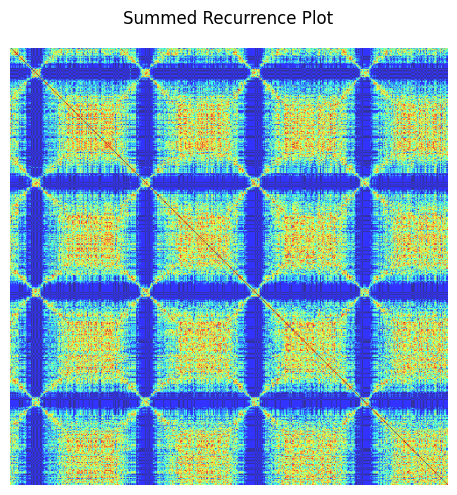

In [ ]:
# Combine recurrence matrices into one
combined_matrix = np.sum(recurrence_matrices, axis=0)
# combined_matrix = recurrence_matrices[5]


# Normalize the combined matrix for visualization (optional)
combined_matrix = (combined_matrix - np.min(combined_matrix)) / (np.max(combined_matrix) - np.min(combined_matrix))

full_image_size = recurrence_matrix.shape[0]  # Assuming square matrix

# Number of sections in each direction
num_sections = full_image_size // 500
# Function to extract and plot a 128x128 section of the image
def plot_section(matrix, start_row, start_col, section_size=500, cmap='jet', alpha=0.5):
    section = matrix[start_row:start_row + section_size, start_col:start_col + section_size]
    return section

# Define the specific section indices you want to view
# i, j = 20, 5  # Change these values to the desired section indices
i, j = 5,5

# Calculate the starting row and column based on the chosen section
start_row = i * 500
start_col = j * 500

# Extract the specified section
section = plot_section(combined_matrix, start_row, start_col, cmap='jet')

# Plot the chosen section
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(section, cmap='jet', alpha=0.8)
ax.axis('off')  # Turn off the axes for a cleaner visualization

# plt.suptitle(f"Jet Colormap - Section ({i}, {j})")  # Title to indicate the section
plt.suptitle(f"Summed Recurrence Plot")  # Title to indicate the section

plt.tight_layout()
plt.show()

# All Plots At Once

In [ ]:
# Combine recurrence matrices into one
# combined_matrix = (recurrence_matrix + recurrence_matrix1 + recurrence_matrix2 +
#                    recurrence_matrix3 + recurrence_matrix4 + recurrence_matrix5 +
#                    recurrence_matrix6 + recurrence_matrix7)

combined_matrix = np.sum(recurrence_matrices, axis=0)

# Normalize the combined matrix for visualization (optional)
combined_matrix = (combined_matrix - np.min(combined_matrix)) / (np.max(combined_matrix) - np.min(combined_matrix))


full_image_size = recurrence_matrix.shape[0]  # Assuming square matrix

# Number of sections in each direction
num_sections = full_image_size // 128
# Function to extract and plot a 128x128 section of the image
def plot_section(matrix, start_row, start_col, section_size=128, cmap='Reds', alpha=0.5):
    section = matrix[start_row:start_row + section_size, start_col:start_col + section_size]
    return section


# Plot each section using the jet colormap
for i in range(num_sections):
    for j in range(num_sections):
        start_row = i * 128
        start_col = j * 128

        # Extract the section
        section = plot_section(combined_matrix, start_row, start_col, cmap='jet')

        # Plot the section
        fig, ax = plt.subplots(figsize=(5, 5))
        ax.imshow(section, cmap='jet', alpha=0.8)
        ax.axis('off')

        plt.suptitle(f"Jet Colormap - Section ({i}, {j})")
        plt.tight_layout()
        plt.show()


Output hidden; open in https://colab.research.google.com to view.

# Preprocessing (RP Greyscale 128x128)

In [ ]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform, cdist

def create_rp(exclude_cols, baseline, file_path):
    """Load CSV, assign label, normalize, and return processed DataFrame."""
    label = ''

    if file_path.endswith('.csv'):
        df = pd.read_csv(file_path)
        if 'good' in file_path:
            df['Label'] = 'good'
            label = 'good'
        elif 'bad' in file_path:
            if 'left' in file_path:
                df['Label'] = 'bad_left'
                label = 'bad_left'
            elif 'right' in file_path:
                df['Label'] = 'bad_right'
                label = 'bad_right'
            elif 'front' in file_path:
                df['Label'] = 'bad_front'
                label = 'bad_front'
            elif 'back' in file_path:
                df['Label'] = 'bad_back'
                label = 'bad_back'
            else:
                df['Label'] = 'bad'
                label = 'bad'
        else:
            df['Label'] = 'unknown'
            label = 'unknown'

        # Find index where any sensor exceeds baseline
        baseline_idx = df[(df[['F0 (V)', 'F1 (V)', 'F2 (V)', 'F3 (V)', 'F4 (V)', 'F5 (V)', 'F6 (V)', 'F7 (V)']] > baseline).any(axis=1)].index[0]
        final_df = df.loc[baseline_idx:].reset_index(drop=True)

        # Normalize data
        #final_df = min_max_scale(final_df, GLOBAL_MIN, GLOBAL_MAX, exclude_cols)

        return final_df, label

# Extract the data for sensor F0 - 7
def generate_recurrence_matrix(df):
  recurrence_matrices = []
  for i in range(8):
    sensor = i
    sensor_data = df[f'F{i} (V)'].values

    threshold = 0.001  # This may need to be adjusted

    distances = cdist(sensor_data.reshape(-1, 1), sensor_data.reshape(-1, 1), metric='euclidean')

    # Apply threshold to create the recurrence matrix
    recurrence_matrix = np.where(distances < threshold, 1, 0)
    recurrence_matrices.append(recurrence_matrix)
  return recurrence_matrices

def plot_section(matrix, start_row, start_col, section_size=128):
    """Extract a 128x128 section from the matrix."""
    return matrix[start_row:start_row + section_size, start_col:start_col + section_size]

def process_all_files(file_list, exclude_cols, baseline):
    """Process multiple CSVs, generate recurrence plots, and store sections in a DataFrame."""
    dataset = []

    for file_path in file_list:
        final_df, label = create_rp(exclude_cols, baseline, file_path)

        # Create recurrence plots for each sensor
        recurrence_matrices = generate_recurrence_matrix(final_df)
        combined_matrix = np.sum(recurrence_matrices, axis=0)

        # normalize matrix
        combined_matrix = (combined_matrix - np.min(combined_matrix)) / (np.max(combined_matrix) - np.min(combined_matrix))

        full_image_size = combined_matrix.shape[0]
        num_sections = full_image_size // 128

        for i in range(num_sections):
            for j in range(num_sections):
                start_row = i * 128
                start_col = j * 128
                section = plot_section(combined_matrix, start_row, start_col)
                dataset.append({'Image': section, 'Label': label})

    return pd.DataFrame(dataset)

In [ ]:
# Load all CSV files
file_list = glob.glob("/content/drive/MyDrive/Research/*.csv")  # Update path
exclude_cols = ['Time (s)', 'Label'] # Exclude these from normalization
baseline = 0.6

# Generate the dataset
rp_dataset_greyscale = process_all_files(file_list, exclude_cols, baseline)

# save_df(rp_dataset_greyscale, "/content/drive/MyDrive/Research/Size128RPGrey_df.pkl")

# Code to save/load df

In [ ]:
import os
import pandas as pd

def save_df(df, filepath):
    directory = os.path.dirname(filepath)
    if not os.path.exists(directory):
        raise FileNotFoundError(f"Directory '{directory}' does not exist.")
    try:
        df.to_pickle(filepath)
        print(f"Dataframe successfully saved to: {filepath}")
    except Exception as e:
        print(f"Failed to save dataframe to {filepath}: {e}")

def load_df(filepath):
    if not os.path.exists(filepath):
        raise FileNotFoundError(f"File path '{filepath}' does not exist.")
    try:
        return pd.read_pickle(filepath)
    except Exception as e:
        print(f"Failed to load dataframe from {filepath}: {e}")
        return None

In [ ]:
save_df(rp_dataset_greyscale, "/content/drive/MyDrive/Research/Size128RPGrey_df.pkl")

Dataframe successfully saved to: /content/drive/MyDrive/Research/Size128RPGrey_df.pkl


In [ ]:
image = rp_dataset_greyscale['Image'][0]

# Check the shape of the array
print(image.shape)  # Should output (128, 128)

(128, 128)


In [ ]:
rp_dataset_greyscale['Image'][0]

array([[1.   , 0.375, 0.25 , ..., 0.5  , 0.125, 0.375],
       [0.375, 1.   , 0.375, ..., 0.625, 0.375, 0.5  ],
       [0.25 , 0.375, 1.   , ..., 0.625, 0.25 , 0.5  ],
       ...,
       [0.5  , 0.625, 0.625, ..., 1.   , 0.25 , 0.5  ],
       [0.125, 0.375, 0.25 , ..., 0.25 , 1.   , 0.25 ],
       [0.375, 0.5  , 0.5  , ..., 0.5  , 0.25 , 1.   ]])

# Max's Model

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model

num_labels = 5
batch_size = 16
epochs = 200
# use functional API to build cnn layers
def create_standard_model(num_labels: int) -> Model:
  inputs = Input(shape=(128, 128, 1), name='input_layer') #Adjust for different sized inputs
  y = Conv2D(filters=64,
            kernel_size=(3, 1),

            activation='relu',
            padding='valid')(inputs)
  y = Conv2D(filters=32,
            kernel_size=(5,5),
            activation='relu',
            padding='same')(y)
  y = MaxPooling2D(pool_size=(2, 2))(y)
  y = Conv2D(filters=32,
            kernel_size=(3,3),
            padding='same')(y)
  y = MaxPooling2D(pool_size=(2, 2))(y)
  flat = Flatten(name='flatten')(y)
  # dropout regularization
  flat = Dropout(0.2, name='dropout')(flat)
  outputs = Dense(num_labels, activation='softmax', name='output_layer')(flat)
  # build the model by supplying inputs/outputs
  model = Model(inputs=inputs, outputs=outputs, name='standard')
  return model

model = create_standard_model(5)
model.summary()

Model: "standard"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 126, 128, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 128, 32)        │          51,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 31, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 31744)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31744)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 5)                   │         158,725 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 219,461 (857.27 KB)

 Trainable params: 219,461 (857.27 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# use functional API to build cnn layers
def create_standard_model(num_labels: int) -> Model:
  inputs = Input(shape=(8, 500, 1), name='input_layer') #Adjust for different sized inputs
  y = Conv2D(filters=64,
            kernel_size=(3, 1),

            activation='relu',
            padding='valid')(inputs)
  y = Conv2D(filters=32,
            kernel_size=(5,5),
            activation='relu',
            padding='same')(y)
  y = MaxPooling2D(pool_size=(2, 2))(y)
  y = Conv2D(filters=32,
            kernel_size=(3,3),
            padding='same')(y)
  y = MaxPooling2D(pool_size=(2, 2))(y)
  flat = Flatten(name='flatten')(y)
  # dropout regularization
  flat = Dropout(0.15, name='dropout')(flat)
  outputs = Dense(num_labels, activation='softmax', name='output_layer')(flat)
  # build the model by supplying inputs/outputs
  model = Model(inputs=inputs, outputs=outputs, name='standard')
  return model


model = create_standard_model(5)
model.summary()

Model: "standard"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 8, 500, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 500, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 6, 500, 32)          │          51,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 250, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 250, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 1, 125, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 5)                   │          20,005 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,741 (315.39 KB)

 Trainable params: 80,741 (315.39 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def create_dilated_model_128(num_labels: int) -> Model:
    inputs = Input(shape=(128, 128, 1), name='input_layer')

    dl1 = Conv2D(filters=32,
                 kernel_size=(5, 5),
                 dilation_rate=(1, 2),
                 activation='relu',
                 padding='same',
                 name='dilated_conv1')(inputs)

    strided1 = Conv2D(filters=32,
                      kernel_size=(3, 3),
                      strides=(2, 2),
                      activation='relu',
                      name='strided_conv1')(dl1)

    dl2 = Conv2D(filters=64,
                 kernel_size=(3, 3),
                 dilation_rate=(1, 2),
                 activation='relu',
                 padding='same',
                 name='dilated_conv2')(strided1)

    strided2 = Conv2D(filters=64,
                      kernel_size=(3, 3),
                      strides=(2, 2),
                      activation='relu',
                      name='strided_conv2')(dl2)

    flat = Flatten(name='flatten')(strided2)
    flat = Dropout(0.15, name='dropout')(flat)

    outputs = Dense(num_labels, activation='softmax', name='output_layer')(flat)

    model = Model(inputs=inputs, outputs=outputs, name='dilated_128')
    return model

model = create_dilated_model_128(5)
model.summary()

Model: "dilated_128"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dilated_conv1 (Conv2D)               │ (None, 128, 128, 32)        │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ strided_conv1 (Conv2D)               │ (None, 63, 63, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dilated_conv2 (Conv2D)               │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ strided_conv2 (Conv2D)               │ (None, 31, 31, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 61504)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 61504)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 5)                   │         307,525 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 373,029 (1.42 MB)

 Trainable params: 373,029 (1.42 MB)

 Non-trainable params: 0 (0.00 B)

TESTING

In [ ]:
rp_dataset_greyscale = load_df("/content/drive/MyDrive/Research/Size128RPJet_df.pkl")

In [ ]:
def create_dilated_model(num_labels: int) -> Model:
  # use functional API to build cnn layers
  inputs = Input(shape=(128, 128, 3), name='input_layer') # Adjust for different sized inputs
  dl1 = Conv2D(filters=32,
                kernel_size=(8, 15),
                dilation_rate=(1, 2),
                activation='relu',
                padding='same',
                name='dilated_conv1')(inputs)

  strided1 = Conv2D(filters=32,
                    kernel_size=(1, 4),
                    strides=(1, 4),
                    name='strided_conv1')(dl1)

  dl2 = Conv2D(filters=16,
                kernel_size=(8, 5),
                dilation_rate=(1, 2),
                activation='relu',
                padding='same',
                name='dilated_conv2')(strided1)

  strided2 = Conv2D(filters=16,
                    kernel_size=(1, 3),
                    strides=(1, 2),
                    name='strided_conv2')(dl2)
  #image to vector before connecting to dense layer
  flat = Flatten(name='flatten')(strided2)
  # dropout regularization
  flat = Dropout(0.15, name='dropout')(flat)

  outputs = Dense(num_labels, activation='softmax', name='output_layer')(flat)

  # build the model by supplying inputs/outputs
  model = Model(inputs=inputs, outputs=outputs, name='dilated')
  return model


initial_lr = 0.001
decay_rate = 0.96
decay_steps = len(X_train) // batch_size  # decay every epoch

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_lr,
    decay_steps=decay_steps,
    decay_rate=decay_rate,
    staircase=True
)
model = create_dilated_model(num_labels)

#model.compile(keras.optimizers.SGD(learning_rate=lr_schedule, momentum = .9), loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "dilated"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dilated_conv1 (Conv2D)               │ (None, 128, 128, 32)        │          11,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ strided_conv1 (Conv2D)               │ (None, 128, 32, 32)         │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dilated_conv2 (Conv2D)               │ (None, 128, 32, 16)         │          20,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ strided_conv2 (Conv2D)               │ (None, 128, 15, 16)         │             784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30720)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30720)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 5)                   │         153,605 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 190,565 (744.39 KB)

 Trainable params: 190,565 (744.39 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np

X = np.array(rp_dataset_greyscale['Image'].tolist())
Y = rp_dataset_greyscale["Label"]

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(Y)
labels_categorical = to_categorical(labels_encoded)

X_train, X_test, y_train, y_test = train_test_split(X, labels_categorical, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (51432, 128, 128, 3)
y_train shape: (51432, 5)
X_test shape: (12859, 128, 128, 3)
y_test shape: (12859, 5)


In [ ]:
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model
from tensorflow import keras

num_labels = 5
batch_size = 16
epochs = 200

def create_dilated_model_128(num_labels: int) -> Model:
    inputs = Input(shape=(128, 128, 3), name='input_layer')

    dl1 = Conv2D(filters=32,
                 kernel_size=(5, 5),
                 dilation_rate=(1, 2),
                 activation='relu',
                 padding='same',
                 name='dilated_conv1')(inputs)

    strided1 = Conv2D(filters=32,
                      kernel_size=(3, 3),
                      strides=(2, 2),
                      activation='relu',
                      name='strided_conv1')(dl1)

    dl2 = Conv2D(filters=64,
                 kernel_size=(3, 3),
                 dilation_rate=(1, 2),
                 activation='relu',
                 padding='same',
                 name='dilated_conv2')(strided1)

    strided2 = Conv2D(filters=64,
                      kernel_size=(3, 3),
                      strides=(2, 2),
                      activation='relu',
                      name='strided_conv2')(dl2)

    flat = Flatten(name='flatten')(strided2)
    flat = Dropout(0.15, name='dropout')(flat)

    outputs = Dense(num_labels, activation='softmax', name='output_layer')(flat)

    model = Model(inputs=inputs, outputs=outputs, name='dilated_128')
    return model

initial_lr = 0.001
decay_rate = 0.96
decay_steps = len(X_train) // batch_size  # decay every epoch

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_lr,
    decay_steps=decay_steps,
    decay_rate=decay_rate,
    staircase=True
)
model = create_dilated_model_128(num_labels)

# model.compile(keras.optimizers.SGD(learning_rate=lr_schedule, momentum = .9), loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "dilated_128"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dilated_conv1 (Conv2D)               │ (None, 128, 128, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ strided_conv1 (Conv2D)               │ (None, 63, 63, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dilated_conv2 (Conv2D)               │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ strided_conv2 (Conv2D)               │ (None, 31, 31, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 61504)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 61504)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 5)                   │         307,525 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 374,629 (1.43 MB)

 Trainable params: 374,629 (1.43 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
# Step 5: Evaluate the Model
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights = True)
history = model.fit(X_train, y_train, epochs=epochs, batch_size = batch_size, validation_split=0.2, callbacks=[callback])
test_loss, test_acc = model.evaluate(X_test, y_test)


model.save("/content/drive/MyDrive/Research/Models/rp_jet_128_dilated.h5")

print(f"Test accuracy: {test_acc}")
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()

Epoch 1/200
2572/2572 ━━━━━━━━━━━━━━━━━━━━ 914s 355ms/step - accuracy: 0.2599 - loss: 6.2358 - val_accuracy: 0.3449 - val_loss: 1.4644
Epoch 2/200
2572/2572 ━━━━━━━━━━━━━━━━━━━━ 889s 346ms/step - accuracy: 0.3601 - loss: 1.4532 - val_accuracy: 0.4645 - val_loss: 1.2549
Epoch 3/200
2572/2572 ━━━━━━━━━━━━━━━━━━━━ 890s 346ms/step - accuracy: 0.4934 - loss: 1.2225 - val_accuracy: 0.4743 - val_loss: 1.2739
Epoch 4/200
2572/2572 ━━━━━━━━━━━━━━━━━━━━ 928s 361ms/step - accuracy: 0.5620 - loss: 1.0872 - val_accuracy: 0.5704 - val_loss: 1.0504
Epoch 5/200
2572/2572 ━━━━━━━━━━━━━━━━━━━━ 878s 341ms/step - accuracy: 0.6244 - loss: 0.9330 - val_accuracy: 0.5899 - val_loss: 0.9979
Epoch 6/200
2572/2572 ━━━━━━━━━━━━━━━━━━━━ 881s 343ms/step - accuracy: 0.6816 - loss: 0.8045 - val_accuracy: 0.5819 - val_loss: 1.0575
Epoch 7/200
2572/2572 ━━━━━━━━━━━━━━━━━━━━ 872s 339ms/step - accuracy: 0.7083 - loss: 0.7298 - val_accuracy: 0.6079 - val_loss: 1.0155
Epoch 8/200
2572/2572 ━━━━━━━━━━━━━━━━━━━━ 868s 337ms/s

Test accuracy: 0.5871374011039734


NameError: name 'plt' is not defined

In [ ]:
def create_dilated_model_500(num_labels: int) -> Model:
    inputs = Input(shape=(500, 500, 1), name='input_layer')

    dl1 = Conv2D(filters=64,
                 kernel_size=(15, 15),
                 dilation_rate=(1, 2),
                 activation='relu',
                 padding='same',
                 name='dilated_conv1')(inputs)

    strided1 = Conv2D(filters=64,
                      kernel_size=(7, 7),
                      strides=(3, 3),
                      activation='relu',
                      name='strided_conv1')(dl1)

    dl2 = Conv2D(filters=128,
                 kernel_size=(7, 7),
                 dilation_rate=(1, 2),
                 activation='relu',
                 padding='same',
                 name='dilated_conv2')(strided1)

    strided2 = Conv2D(filters=128,
                      kernel_size=(5, 5),
                      strides=(2, 2),
                      activation='relu',
                      name='strided_conv2')(dl2)

    flat = Flatten(name='flatten')(strided2)
    flat = Dropout(0.15, name='dropout')(flat)

    outputs = Dense(num_labels, activation='softmax', name='output_layer')(flat)

    model = Model(inputs=inputs, outputs=outputs, name='dilated_500')
    return model

initial_lr = 0.001
decay_rate = 0.96
decay_steps = 1500 // batch_size  # decay every epoch

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_lr,
    decay_steps=decay_steps,
    decay_rate=decay_rate,
    staircase=True
)
model = create_dilated_model(num_labels)

# model.compile(keras.optimizers.SGD(learning_rate=lr_schedule, momentum = .9), loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "dilated"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 8, 500, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dilated_conv1 (Conv2D)               │ (None, 8, 500, 32)          │           3,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ strided_conv1 (Conv2D)               │ (None, 8, 125, 32)          │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dilated_conv2 (Conv2D)               │ (None, 8, 125, 16)          │          20,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ strided_conv2 (Conv2D)               │ (None, 8, 62, 16)           │             784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7936)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7936)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 5)                   │          39,685 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 68,965 (269.39 KB)

 Trainable params: 68,965 (269.39 KB)

 Non-trainable params: 0 (0.00 B)

# Model for 128x128 Greyscale RP

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SeparableConv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout

model = Sequential()

# 1st Convolutional Layer (Reduced filters, SeparableConv2D)
model.add(SeparableConv2D(16, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 1)))
model.add(MaxPooling2D((2, 2)))

# 2nd Convolutional Layer
model.add(SeparableConv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Replace Flatten() with GlobalAveragePooling2D()
model.add(GlobalAveragePooling2D())

# Reduced Dense layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.15))  # Dropout rate of 15%

# Output layer
model.add(Dense(5, activation='softmax'))

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_separable_conv.py:104: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ separable_conv2d_2 (SeparableConv2D) │ (None, 128, 128, 16)        │              41 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_3 (SeparableConv2D) │ (None, 64, 64, 32)          │             688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 32)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,166 (12.37 KB)

 Trainable params: 3,166 (12.37 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SeparableConv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout

model = Sequential()

# 1st Convolutional Layer (Reduced filters, SeparableConv2D)
model.add(SeparableConv2D(16, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 1)))
model.add(MaxPooling2D((2, 2)))

# 2nd Convolutional Layer
model.add(SeparableConv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Replace Flatten() with GlobalAveragePooling2D()
model.add(GlobalAveragePooling2D())

# Reduced Dense layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))  # Dropout rate of 15%

# Output layer
model.add(Dense(5, activation='softmax'))

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ separable_conv2d_16                  │ (None, 128, 128, 16)        │              41 │
│ (SeparableConv2D)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_17                  │ (None, 64, 64, 32)          │             688 │
│ (SeparableConv2D)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_8           │ (None, 32)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,166 (12.37 KB)

 Trainable params: 3,166 (12.37 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np

X = np.array(rp_dataset_greyscale['Image'].tolist())
Y = rp_dataset_greyscale["Label"]

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(Y)
labels_categorical = to_categorical(labels_encoded)

X_train, X_test, y_train, y_test = train_test_split(X, labels_categorical, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (51432, 128, 128)
y_train shape: (51432, 5)
X_test shape: (12859, 128, 128)
y_test shape: (12859, 5)


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# # Step 5: Evaluate the Model
# callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights = True)
# history = model.fit(X_train, y_train, epochs=epochs, batch_size = batch_size, validation_split=0.2, callbacks=[callback])
# test_loss, test_acc = model.evaluate(X_test, y_test)


from tensorflow.keras.callbacks import EarlyStopping

# Early stopping setup
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
  X_train, y_train, epochs=200, batch_size = 32, validation_split=0.2, callbacks=[early_stopping]
)
if history is None:
    raise ValueError("The model training did not return a valid history object.")
test_loss, test_acc = model.evaluate(X_test, y_test)

model.save("/content/drive/MyDrive/Research/Models/rp_grey_separable_128.keras")

print(f"Test accuracy: {test_acc}")
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()

Epoch 1/200
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 91s 69ms/step - accuracy: 0.3275 - loss: 1.4717 - val_accuracy: 0.4027 - val_loss: 1.3265
Epoch 2/200
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 81s 63ms/step - accuracy: 0.3989 - loss: 1.3193 - val_accuracy: 0.4604 - val_loss: 1.2592
Epoch 3/200
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 81s 63ms/step - accuracy: 0.4510 - loss: 1.2443 - val_accuracy: 0.5273 - val_loss: 1.1362
Epoch 4/200
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 82s 64ms/step - accuracy: 0.4914 - loss: 1.1507 - val_accuracy: 0.5543 - val_loss: 1.0612
Epoch 5/200
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 78s 61ms/step - accuracy: 0.5276 - loss: 1.0918 - val_accuracy: 0.5579 - val_loss: 1.0203
Epoch 6/200
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 79s 62ms/step - accuracy: 0.5603 - loss: 1.0496 - val_accuracy: 0.6180 - val_loss: 0.9551
Epoch 7/200
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 79s 61ms/step - accuracy: 0.5816 - loss: 1.0118 - val_accuracy: 0.6493 - val_loss: 0.9047
Epoch 8/200
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 79s 62ms/step - accuracy: 

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping setup
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
  X_train, y_train, epochs=200, batch_size = 32, validation_split=0.2, callbacks=[early_stopping]
)
if history is None:
    raise ValueError("The model training did not return a valid history object.")
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

import tensorflow as tf
model.save("/content/drive/MyDrive/Research/Models/rp_grey_128.h5")

Epoch 1/200
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 80s 62ms/step - accuracy: 0.3253 - loss: 1.4447 - val_accuracy: 0.3958 - val_loss: 1.2786
Epoch 2/200
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 77s 61ms/step - accuracy: 0.4150 - loss: 1.2523 - val_accuracy: 0.4881 - val_loss: 1.2041
Epoch 3/200
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 84s 66ms/step - accuracy: 0.4740 - loss: 1.1626 - val_accuracy: 0.4883 - val_loss: 1.1251
Epoch 4/200
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 81s 64ms/step - accuracy: 0.5034 - loss: 1.0972 - val_accuracy: 0.5480 - val_loss: 1.0371
Epoch 5/200
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 82s 64ms/step - accuracy: 0.5560 - loss: 1.0076 - val_accuracy: 0.5759 - val_loss: 0.9890
Epoch 6/200
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 79s 62ms/step - accuracy: 0.5946 - loss: 0.9354 - val_accuracy: 0.6262 - val_loss: 0.9055
Epoch 7/200
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 79s 62ms/step - accuracy: 0.6287 - loss: 0.8671 - val_accuracy: 0.6328 - val_loss: 0.8358
Epoch 8/200
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 79s 62ms/step - accuracy: 

Test accuracy: 0.871946394443512


In [ ]:
from sklearn.metrics import f1_score

# Get test predictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to class labels

f1 = f1_score(y_test, y_pred_classes, average='macro')  # Change 'macro' to other options if needed
print(f1)


397/397 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step
0.8711386567542615


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform, cdist
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

def test_unseen_data(df, model, label_encoder):

      # Prepare the unseen data
      X_unseen = np.array(df['Image'].tolist())
      Y_unseen = df["Label"]

      # Encode and categorize the labels
      labels_encoded = label_encoder.transform(Y_unseen)
      labels_categorical = to_categorical(labels_encoded)

      # Predict using the model

      y_pred_prob = model.predict(X_unseen.reshape(-1, 128, 128, 3))
      y_pred = np.argmax(y_pred_prob, axis=1)
      y_true = np.argmax(labels_categorical, axis=1)


      labels_guessed = list(set(np.concatenate((y_pred, y_true))))

      # Confusion Matrix
      confusion = confusion_matrix(y_true, y_pred)

      # Plot Confusion Matrix
      plt.figure(figsize=(10, 7))
      sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
      plt.title("Confusion Matrix Unseen", fontsize=16)
      plt.xlabel('Predicted Labels', fontsize=14)
      plt.ylabel('True Labels', fontsize=14)
      plt.xticks(rotation=45)
      plt.yticks(rotation=45)
      plt.show()

      # Classification Report
      print(labels_guessed)
      report = classification_report(y_true, y_pred, labels=labels_guessed, target_names=label_encoder.classes_, zero_division=0)
      print("Classification Report:")
      print(report)

In [ ]:
# Load all CSV files
file_list = glob.glob("/content/drive/MyDrive/Research/Unseen Data Ellipse/*.csv")  # Update path
exclude_cols = ['Time (s)', 'Label'] # Exclude these from normalization
baseline = 0.6

rp_bad_dataset_greyscale_rect = process_all_files(file_list, exclude_cols, baseline)

In [ ]:
image = rp_bad_dataset_greyscale_rect['Image'][0]

# Check the shape of the array
print(image)  # Should output (128, 128)

[[1.    0.625 0.75  ... 0.75  0.375 0.75 ]
 [0.625 1.    0.875 ... 0.625 0.625 0.625]
 [0.75  0.875 1.    ... 0.75  0.5   0.75 ]
 ...
 [0.75  0.625 0.75  ... 1.    0.625 0.875]
 [0.375 0.625 0.5   ... 0.625 1.    0.5  ]
 [0.75  0.625 0.75  ... 0.875 0.5   1.   ]]


In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model("/content/drive/MyDrive/Research/Models/rp_grey_128.h5")

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ separable_conv2d (SeparableConv2D)   │ (None, 128, 128, 16)        │              41 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_1 (SeparableConv2D) │ (None, 64, 64, 32)          │             688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 32)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,168 (12.38 KB)

 Trainable params: 3,166 (12.37 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

# Unseen Data (Greyscale)

In [ ]:
# Load all CSV files
file_list = glob.glob("/content/drive/MyDrive/Pressure Sensor Maching Learning/Unseen Data Medium Circle/*.csv")  # Update path
exclude_cols = ['Time (s)', 'Label'] # Exclude these from normalization
baseline = 0.6

rp_bad_dataset_greyscale_med_circle = process_all_files(file_list, exclude_cols, baseline)

241/241 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step


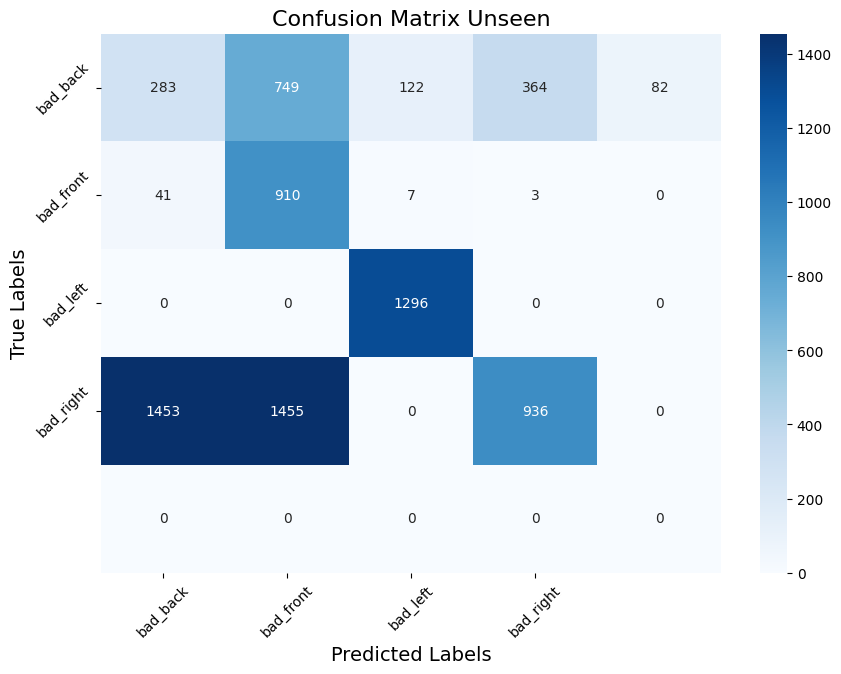

[0, 1, 2, 3, 4]
Classification Report:
              precision    recall  f1-score   support

    bad_back       0.16      0.18      0.17      1600
   bad_front       0.29      0.95      0.45       961
    bad_left       0.91      1.00      0.95      1296
   bad_right       0.72      0.24      0.36      3844

    accuracy                           0.44      7701
   macro avg       0.42      0.47      0.39      7701
weighted avg       0.58      0.44      0.43      7701



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:2687: UserWarning: labels size, 5, does not match size of target_names, 4
  warnings.warn(


In [ ]:
from sklearn.preprocessing import LabelEncoder

Y = rp_bad_dataset_greyscale_med_circle["Label"]

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(Y)

test_unseen_data(rp_bad_dataset_greyscale_med_circle, model, label_encoder)

In [ ]:
# Load all CSV files
file_list = glob.glob("/content/drive/MyDrive/Pressure Sensor Maching Learning/Unseen Data Large Ellipse/*.csv")  # Update path
exclude_cols = ['Time (s)', 'Label'] # Exclude these from normalization
baseline = 0.6

rp_bad_dataset_greyscale_large_ellipse = process_all_files(file_list, exclude_cols, baseline)

849/849 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step


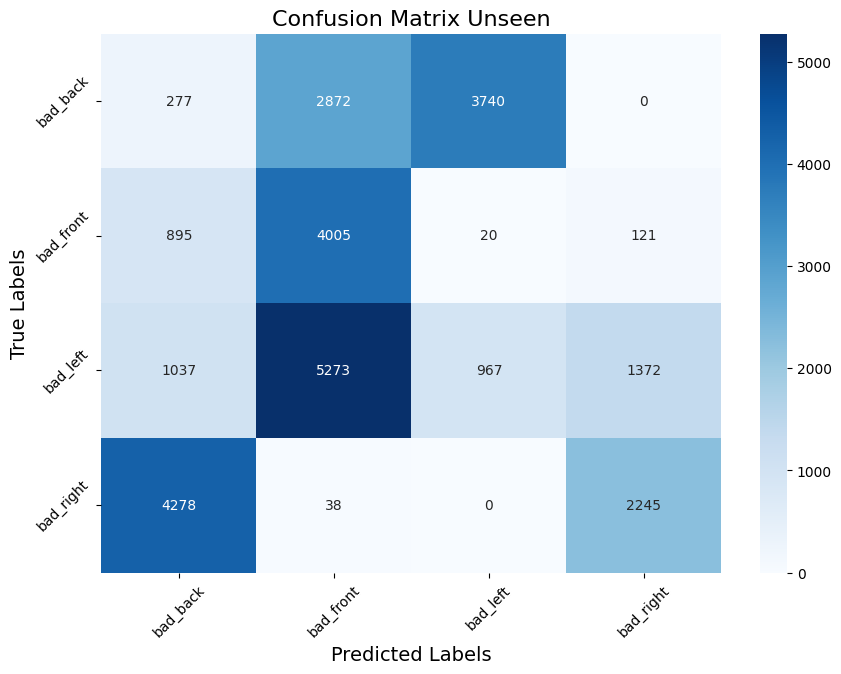

[0, 1, 2, 3]
Classification Report:
              precision    recall  f1-score   support

    bad_back       0.04      0.04      0.04      6889
   bad_front       0.33      0.79      0.46      5041
    bad_left       0.20      0.11      0.14      8649
   bad_right       0.60      0.34      0.44      6561

    accuracy                           0.28     27140
   macro avg       0.29      0.32      0.27     27140
weighted avg       0.28      0.28      0.25     27140



In [ ]:
from sklearn.preprocessing import LabelEncoder

Y = rp_bad_dataset_greyscale_large_ellipse["Label"]

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(Y)

test_unseen_data(rp_bad_dataset_greyscale_large_ellipse, model, label_encoder)

# Preprocessing (128x128 Jet Colormap)

In [ ]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import cv2
from scipy.spatial.distance import pdist, squareform, cdist

def create_rp(exclude_cols, baseline, file_path):
    label = ''

    if file_path.endswith('.csv'):
        df = pd.read_csv(file_path)
        if 'good' in file_path:
            label = 'good'
        elif 'bad' in file_path:
            if 'left' in file_path:
                label = 'bad_left'
            elif 'right' in file_path:
                label = 'bad_right'
            elif 'front' in file_path:
                label = 'bad_front'
            elif 'back' in file_path:
                label = 'bad_back'
            else:
                label = 'bad'
        else:
            label = 'unknown'

        # Find the index of the first row where any sensor value exceeds the baseline
        baseline_idx = df[(df[['F0 (V)', 'F1 (V)', 'F2 (V)', 'F3 (V)',
                               'F4 (V)', 'F5 (V)', 'F6 (V)', 'F7 (V)']] > baseline).any(axis=1)].index[0]

        # Slice the DataFrame from that index onward
        final_df = df.loc[baseline_idx:].reset_index(drop=True)

        # Min-max scaling
        #final_df = min_max_scale(final_df, GLOBAL_MIN, GLOBAL_MAX, exclude_cols)

        # ✅ Fix: Ensure the function returns **two** values
        return final_df, label  # ✅ Make sure to return both

# Extract the data for sensor F0 - 7
def generate_recurrence_matrix(df):
  recurrence_matrices = []
  for i in range(8):
    sensor = i
    sensor_data = df[f'F{i} (V)'].values

    threshold = 0.001  # This may need to be adjusted

    distances = cdist(sensor_data.reshape(-1, 1), sensor_data.reshape(-1, 1), metric='euclidean')

    # Apply threshold to create the recurrence matrix
    recurrence_matrix = np.where(distances < threshold, 1, 0)
    recurrence_matrices.append(recurrence_matrix)
  return recurrence_matrices


def apply_colormap(matrix, cmap='jet'):
    """Apply a colormap and convert to RGB format."""
    # norm_matrix = (matrix - np.min(matrix)) / (np.max(matrix) - np.min(matrix) + 1e-8)  # Normalize to [0,1]
    norm_matrix = (matrix - np.min(matrix)) / (np.max(matrix) - np.min(matrix))
    colormap = plt.get_cmap(cmap)
    colored_matrix = colormap(norm_matrix)[:, :, :3]  # Extract only RGB channels
    return (colored_matrix * 255).astype(np.uint8)  # Convert to 8-bit RGB image

def process_all_files(file_list, exclude_cols, baseline):
    """Process CSVs, generate summed recurrence plots, apply colormap, and store 128x128 sections."""
    dataset = []

    for file_path in file_list:
        final_df, label = create_rp(exclude_cols, baseline, file_path)

        # Generate recurrence matrices for all 8 sensors
        recurrence_matrices = generate_recurrence_matrix(final_df)

        # Sum all recurrence matrices
        combined_matrix = np.sum(recurrence_matrices, axis=0)

        # Apply 'jet' colormap to the summed matrix
        colored_image = apply_colormap(combined_matrix, cmap='jet')

        full_image_size = combined_matrix.shape[0]  # Assuming square matrix
        num_sections = full_image_size // 128

        for i in range(num_sections):
            for j in range(num_sections):
                start_row = i * 128
                start_col = j * 128
                section = colored_image[start_row:start_row + 128, start_col:start_col + 128, :]

                dataset.append({'Image': section, 'Label': label})

    return pd.DataFrame(dataset)

In [ ]:
# Load all CSV files
file_list = glob.glob("/content/drive/MyDrive/Research/*.csv")  # Update path
exclude_cols = ['Time (s)', 'Label'] # Exclude these from normalization
baseline = 0.6

# Generate the dataset
rp_dataset = process_all_files(file_list, exclude_cols, baseline)

# save_df(rp_dataset, "/content/drive/MyDrive/Research/Size128RPJet_df.pkl")

In [ ]:
rp_dataset

,Image,Label
0,"[[[127, 0, 0], [21, 255, 225], [0, 128, 255], ...",good
1,"[[[0, 0, 127], [21, 255, 225], [124, 255, 121]...",good
2,"[[[255, 148, 0], [124, 255, 121], [228, 255, 1...",good
3,"[[[0, 128, 255], [255, 29, 0], [124, 255, 121]...",good
4,"[[[124, 255, 121], [124, 255, 121], [0, 0, 255...",good
...,...,...
63445,"[[[124, 255, 121], [21, 255, 225], [0, 128, 25...",good
63446,"[[[21, 255, 225], [127, 0, 0], [255, 148, 0], ...",good
63447,"[[[0, 128, 255], [0, 0, 255], [0, 128, 255], [...",good
63448,"[[[21, 255, 225], [0, 128, 255], [0, 128, 255]...",good


In [ ]:
rp_dataset["Image"][0].shape

(128, 128, 3)

# CNN Model for 128x128 Jet Colormap RP

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SeparableConv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout

model = Sequential()

# 1st Convolutional Layer (Reduced filters, SeparableConv2D)
model.add(SeparableConv2D(16, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))

# 2nd Convolutional Layer
model.add(SeparableConv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Replace Flatten() with GlobalAveragePooling2D()
model.add(GlobalAveragePooling2D())

# Reduced Dense layer
model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))  # Dropout rate of 15%

# Output layer
model.add(Dense(5, activation='softmax'))

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_separable_conv.py:104: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ separable_conv2d_18                  │ (None, 128, 128, 16)        │              91 │
│ (SeparableConv2D)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_19                  │ (None, 64, 64, 32)          │             688 │
│ (SeparableConv2D)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_9           │ (None, 32)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,216 (12.56 KB)

 Trainable params: 3,216 (12.56 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from tensorflow.keras.utils import to_categorical

# Assume you have your dataset loaded as X and y
# X shape: (num_samples, 128, 128, 3)
# y shape: (num_samples,) with integer labels 0 to 4

num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
fold_no = 1
acc_per_fold = []
loss_per_fold = []

# One-hot encode labels
y_cat = to_categorical(y_, num_classes=5)

for train_idx, val_idx in kfold.split(X, y_cat):
    # Split data
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y_cat[train_idx], y_cat[val_idx]

    # Build model inside the loop
    model = Sequential()
    model.add(SeparableConv2D(16, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(SeparableConv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))  # Enable dropout
    model.add(Dense(5, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    print(f'\n🔁 Training for fold {fold_no}...')
    history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=1)

    scores = model.evaluate(X_val, y_val, verbose=0)
    acc_per_fold.append(scores[1])
    loss_per_fold.append(scores[0])

    print(f'Score for fold {fold_no}: Loss = {scores[0]:.4f}, Accuracy = {scores[1]*100:.2f}%')
    fold_no += 1

print('\nAverage scores:')
print(f'> Accuracy: {np.mean(acc_per_fold):.2f} ± {np.std(acc_per_fold):.2f}')
print(f'> Loss: {np.mean(loss_per_fold):.4f}')


ValueError: Found input variables with inconsistent numbers of samples: [64291, 51432]

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SeparableConv2D, MaxPooling2D, GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam

# Prepare data
X = np.array(rp_dataset['Image'].tolist())  # shape (samples, 128, 128, 3)
Y = rp_dataset["Label"]

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(Y)
labels_categorical = to_categorical(labels_encoded)

# Initialize Stratified K-Fold
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Store performance per fold
fold_accuracies = []

# K-Fold loop
for fold, (train_idx, val_idx) in enumerate(skf.split(X, labels_encoded)):
    print(f"\n--- Fold {fold+1} ---")

    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = labels_categorical[train_idx], labels_categorical[val_idx]

    # Define model architecture inside the loop
    model = Sequential()
    model.add(SeparableConv2D(16, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(SeparableConv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(5, activation='softmax'))

    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_val, y_val))

    # Evaluate
    scores = model.evaluate(X_val, y_val, verbose=0)
    print(f"Validation Accuracy for fold {fold+1}: {scores[1]*100:.2f}%")
    fold_accuracies.append(scores[1])

# Summary
print(f"\nAverage Validation Accuracy over {k} folds: {np.mean(fold_accuracies)*100:.2f}%")



--- Fold 1 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_separable_conv.py:104: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 119s 73ms/step - accuracy: 0.3981 - loss: 1.3902 - val_accuracy: 0.6286 - val_loss: 0.8873
Epoch 2/10
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 115s 71ms/step - accuracy: 0.6929 - loss: 0.7768 - val_accuracy: 0.7743 - val_loss: 0.5837
Epoch 3/10
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 115s 72ms/step - accuracy: 0.7830 - loss: 0.5726 - val_accuracy: 0.7577 - val_loss: 0.6443
Epoch 4/10
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 113s 70ms/step - accuracy: 0.8148 - loss: 0.4912 - val_accuracy: 0.7824 - val_loss: 0.5517
Epoch 5/10
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 116s 72ms/step - accuracy: 0.8384 - loss: 0.4288 - val_accuracy: 0.8540 - val_loss: 0.3818
Epoch 6/10
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 118s 73ms/step - accuracy: 0.8508 - loss: 0.4004 - val_accuracy: 0.8641 - val_loss: 0.3574
Epoch 7/10
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 117s 73ms/step - accuracy: 0.8651 - loss: 0.3556 - val_accuracy: 0.8876 - val_loss: 0.2999
Epoch 8/10
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 110s 68ms/step - accuracy: 

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import SeparableConv2D, MaxPooling2D, GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam

# Preprocess data
X = np.array(rp_dataset['Image'].tolist())  # Assuming shape (N, 128, 128, 3)
Y = rp_dataset["Label"]

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(Y)
labels_categorical = to_categorical(labels_encoded)

# Hold out 20% as unseen test data
X_temp, X_test, y_temp, y_test = train_test_split(
    X, labels_categorical, test_size=0.2, stratify=labels_encoded, random_state=42
)
y_temp_encoded = np.argmax(y_temp, axis=1)  # For stratified k-fold

# Define model architecture
def build_model():
    model = Sequential([
        SeparableConv2D(16, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
        MaxPooling2D((2, 2)),
        SeparableConv2D(32, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        GlobalAveragePooling2D(),
        Dense(64, activation='relu'),
        Dense(5, activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Set up K-Fold Cross Validation
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
best_val_accuracy = 0
best_fold = -1

# Cross-validation loop
for fold, (train_idx, val_idx) in enumerate(skf.split(X_temp, y_temp_encoded)):
    print(f"\n--- Fold {fold + 1} ---")

    X_train, X_val = X_temp[train_idx], X_temp[val_idx]
    y_train, y_val = y_temp[train_idx], y_temp[val_idx]

    model = build_model()
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_val, y_val))

    val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
    print(f"Validation Accuracy for fold {fold + 1}: {val_acc * 100:.2f}%")

    if val_acc > best_val_accuracy:
        best_val_accuracy = val_acc
        best_fold = fold + 1
        model.save("/content/drive/MyDrive/Research/Models/best_model.keras")  # Save entire model



--- Fold 1 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_separable_conv.py:104: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 96s 73ms/step - accuracy: 0.3767 - loss: 2.0654 - val_accuracy: 0.5770 - val_loss: 1.0991
Epoch 2/10
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 91s 71ms/step - accuracy: 0.5554 - loss: 1.0554 - val_accuracy: 0.6055 - val_loss: 0.9131
Epoch 3/10
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 92s 72ms/step - accuracy: 0.6622 - loss: 0.8398 - val_accuracy: 0.7116 - val_loss: 0.7078
Epoch 4/10
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 92s 71ms/step - accuracy: 0.7427 - loss: 0.6616 - val_accuracy: 0.7697 - val_loss: 0.5920
Epoch 5/10
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 90s 70ms/step - accuracy: 0.7851 - loss: 0.5676 - val_accuracy: 0.8209 - val_loss: 0.4746
Epoch 6/10
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 90s 70ms/step - accuracy: 0.7987 - loss: 0.5260 - val_accuracy: 0.7988 - val_loss: 0.5146
Epoch 7/10
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 90s 70ms/step - accuracy: 0.8189 - loss: 0.4844 - val_accuracy: 0.8347 - val_loss: 0.4549
Epoch 8/10
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 91s 71ms/step - accuracy: 0.8264 -

In [ ]:
rp_dataset = load_df("/content/drive/MyDrive/Research/Size128RPJet_df.pkl")
print(rp_dataset.shape)

(64291, 2)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

X = np.array(rp_dataset['Image'].tolist())
Y = rp_dataset["Label"]

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(Y)
labels_categorical = to_categorical(labels_encoded)

X_train, X_test, y_train, y_test = train_test_split(X, labels_categorical, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (51432, 128, 128, 3)
y_train shape: (51432, 5)
X_test shape: (12859, 128, 128, 3)
y_test shape: (12859, 5)


Epoch 1/200
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 92s 71ms/step - accuracy: 0.3180 - loss: 1.8381 - val_accuracy: 0.4914 - val_loss: 1.2397
Epoch 2/200
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 87s 68ms/step - accuracy: 0.5089 - loss: 1.1364 - val_accuracy: 0.5019 - val_loss: 1.1006
Epoch 3/200
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 90s 70ms/step - accuracy: 0.6166 - loss: 0.9090 - val_accuracy: 0.6490 - val_loss: 0.8678
Epoch 4/200
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 89s 69ms/step - accuracy: 0.7056 - loss: 0.7548 - val_accuracy: 0.7964 - val_loss: 0.5859
Epoch 5/200
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 90s 70ms/step - accuracy: 0.7525 - loss: 0.6456 - val_accuracy: 0.7975 - val_loss: 0.5609
Epoch 6/200
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 88s 68ms/step - accuracy: 0.7819 - loss: 0.5701 - val_accuracy: 0.8178 - val_loss: 0.4917
Epoch 7/200
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 88s 69ms/step - accuracy: 0.8059 - loss: 0.5074 - val_accuracy: 0.8338 - val_loss: 0.4523
Epoch 8/200
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 88s 68ms/step - accuracy: 

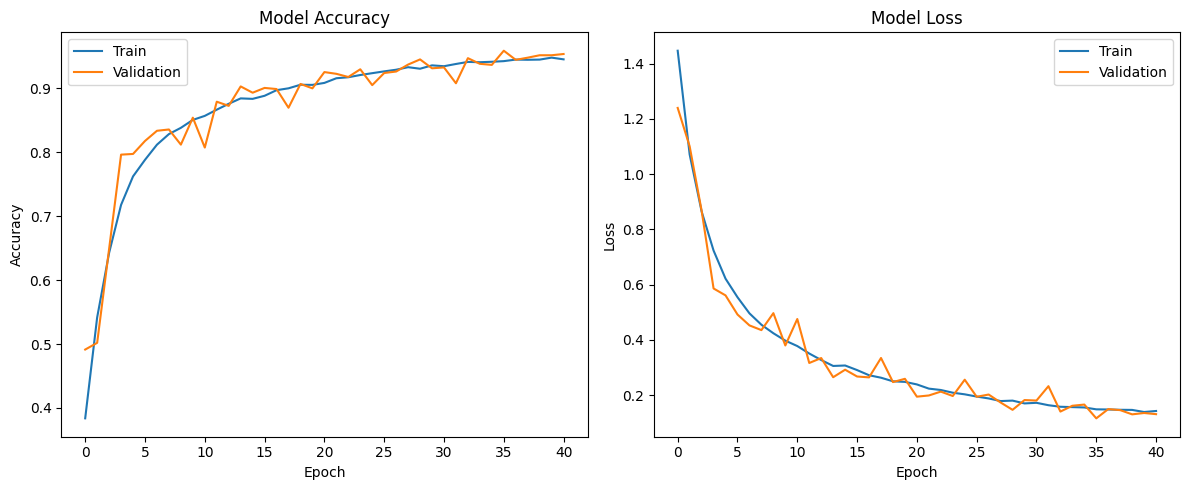

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# # Step 5: Evaluate the Model
# callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights = True)
# history = model.fit(X_train, y_train, epochs=epochs, batch_size = batch_size, validation_split=0.2, callbacks=[callback])
# test_loss, test_acc = model.evaluate(X_test, y_test)


from tensorflow.keras.callbacks import EarlyStopping

# Early stopping setup
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
  X_train, y_train, epochs=200, batch_size = 32, validation_split=0.2, callbacks=[early_stopping]
)
if history is None:
    raise ValueError("The model training did not return a valid history object.")
test_loss, test_acc = model.evaluate(X_test, y_test)

model.save("/content/drive/MyDrive/Research/Models/rp_jet_separable_128_no_dropout.keras")

print(f"Test accuracy: {test_acc}")
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()

402/402 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step
['bad_back' 'bad_front' 'bad_left' 'bad_right' 'good']
Classification Report:
              precision    recall  f1-score   support

    bad_back       0.96      0.97      0.97      3354
   bad_front       0.97      0.98      0.98      2496
    bad_left       0.95      0.95      0.95      2557
   bad_right       0.98      0.93      0.95      2385
        good       0.93      0.94      0.93      2067

    accuracy                           0.96     12859
   macro avg       0.96      0.96      0.96     12859
weighted avg       0.96      0.96      0.96     12859



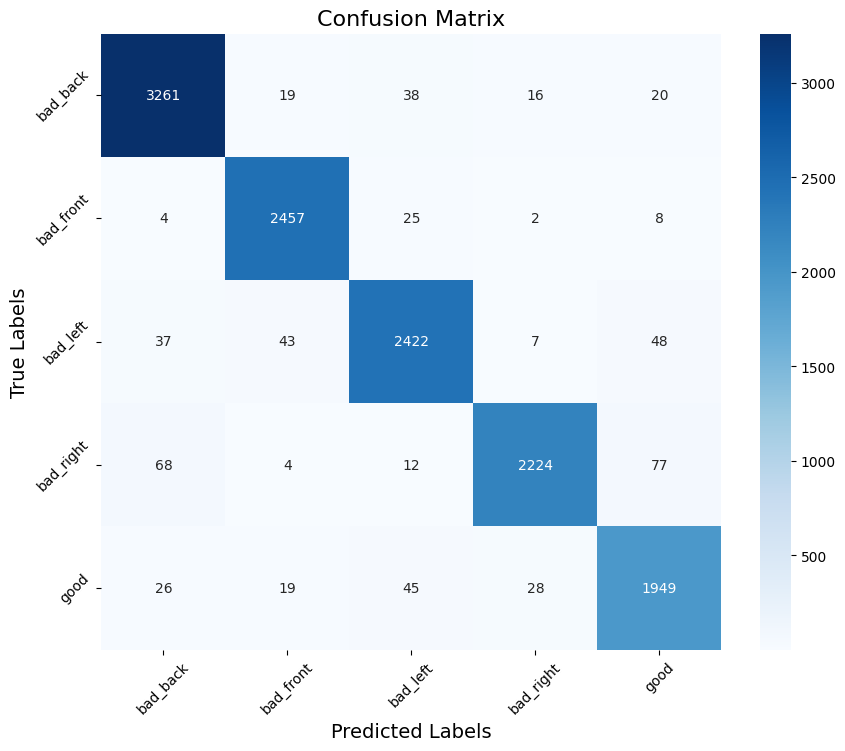

In [ ]:
# for no dropout layer

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

y_pred_prob = model.predict(X_test.reshape(-1, 128, 128, 3))  # Predicted probabilities
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)
labels = label_encoder.classes_
print(labels)

# Confusion Matrix
confusion = confusion_matrix(y_true, y_pred)

# Classification Report
report = classification_report(y_true, y_pred, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)

# Plotting the confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Adding labels and title
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

# Rotate the x and y labels
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.show()

241/241 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step


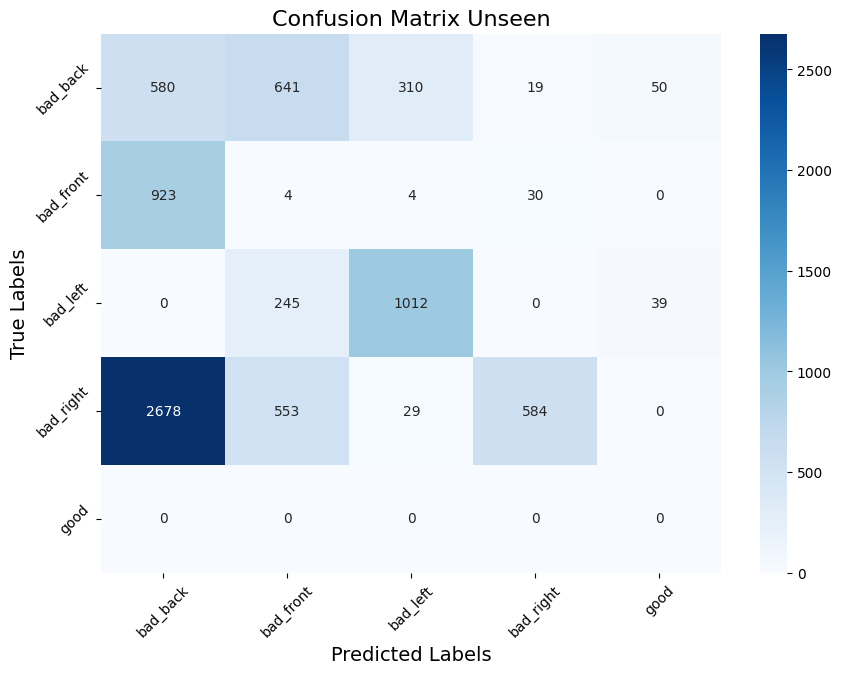

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
Classification Report:
              precision    recall  f1-score   support

    bad_back       0.14      0.36      0.20      1600
   bad_front       0.00      0.00      0.00       961
    bad_left       0.75      0.78      0.76      1296
   bad_right       0.92      0.15      0.26      3844
        good       0.00      0.00      0.00         0

    accuracy                           0.28      7701
   macro avg       0.36      0.26      0.25      7701
weighted avg       0.62      0.28      0.30      7701



In [ ]:
test_unseen_data(rp_bad_dataset_greyscale_med_circle, model, label_encoder)

849/849 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step


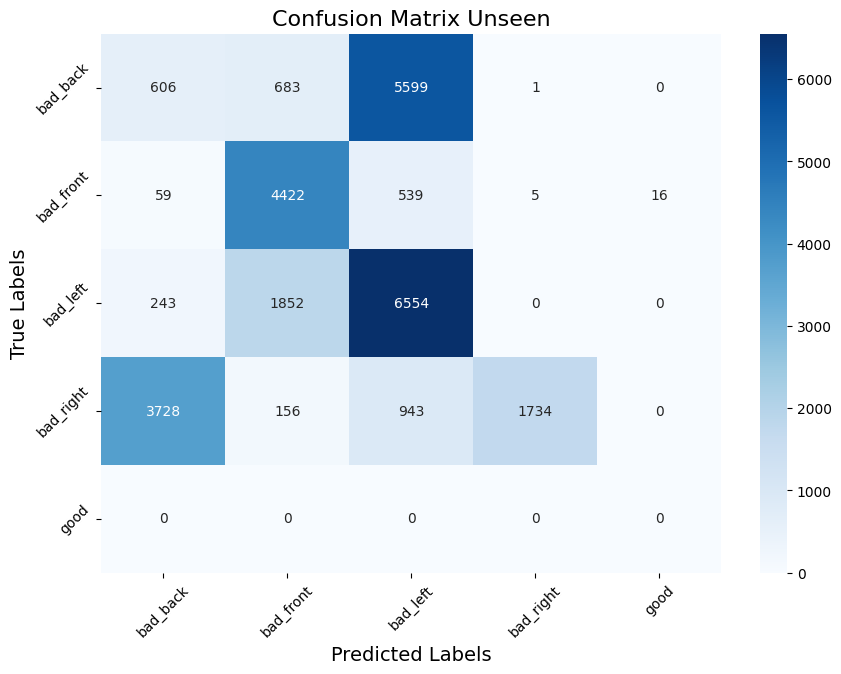

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
Classification Report:
              precision    recall  f1-score   support

    bad_back       0.13      0.09      0.11      6889
   bad_front       0.62      0.88      0.73      5041
    bad_left       0.48      0.76      0.59      8649
   bad_right       1.00      0.26      0.42      6561
        good       0.00      0.00      0.00         0

    accuracy                           0.49     27140
   macro avg       0.45      0.40      0.37     27140
weighted avg       0.54      0.49      0.45     27140



In [ ]:
test_unseen_data(rp_bad_dataset_greyscale_ellipse, model, label_encoder)

402/402 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step
['bad_back' 'bad_front' 'bad_left' 'bad_right' 'good']
Classification Report:
              precision    recall  f1-score   support

    bad_back       0.93      0.92      0.93      3354
   bad_front       0.94      0.94      0.94      2496
    bad_left       0.89      0.88      0.88      2557
   bad_right       0.94      0.89      0.92      2385
        good       0.84      0.93      0.88      2067

    accuracy                           0.91     12859
   macro avg       0.91      0.91      0.91     12859
weighted avg       0.91      0.91      0.91     12859



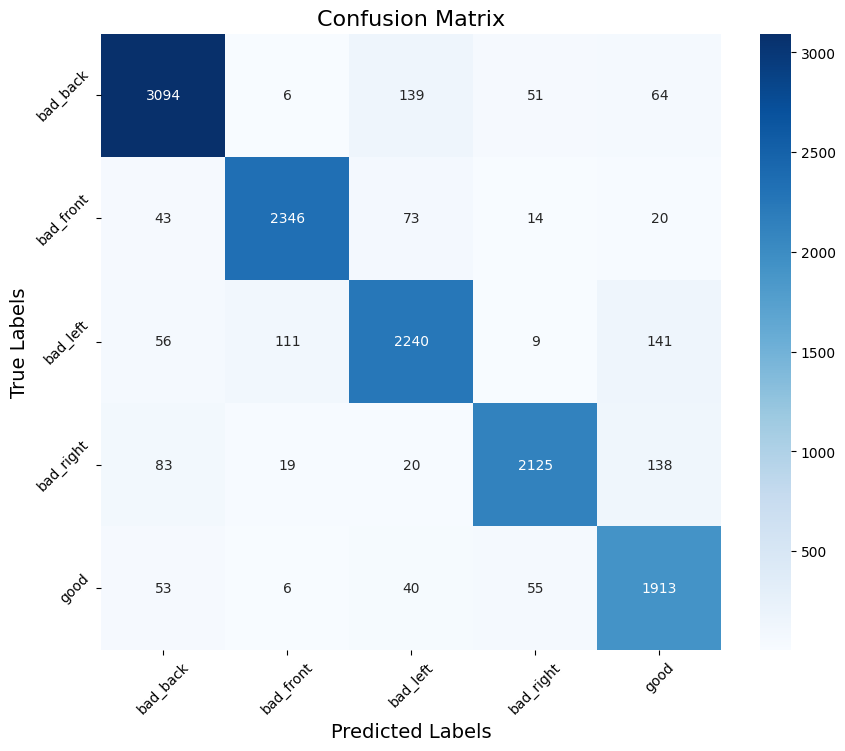

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

y_pred_prob = model.predict(X_test.reshape(-1, 128, 128, 3))  # Predicted probabilities
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)
labels = label_encoder.classes_
print(labels)

# Confusion Matrix
confusion = confusion_matrix(y_true, y_pred)

# Classification Report
report = classification_report(y_true, y_pred, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)

# Plotting the confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Adding labels and title
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

# Rotate the x and y labels
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
#Unseen
# Load all CSV files
file_list = glob.glob("/content/drive/MyDrive/Pressure Sensor Maching Learning/Unseen Data Medium Circle/*.csv")  # Update path
exclude_cols = ['Time (s)', 'Label'] # Exclude these from normalization
baseline = 0.6

rp_bad_dataset_greyscale_med_circle = process_all_files(file_list, exclude_cols, baseline)

In [ ]:
rp_bad_dataset_greyscale_med_circle["Image"]

,Image
0,"[[[127, 0, 0], [255, 148, 0], [228, 255, 18], ..."
1,"[[[21, 255, 225], [21, 255, 225], [255, 148, 0..."
2,"[[[255, 148, 0], [21, 255, 225], [124, 255, 12..."
3,"[[[124, 255, 121], [124, 255, 121], [21, 255, ..."
4,"[[[0, 0, 127], [0, 0, 127], [0, 0, 127], [0, 0..."
...,...
7696,"[[[0, 0, 255], [0, 0, 255], [0, 0, 255], [0, 0..."
7697,"[[[0, 0, 255], [0, 0, 127], [0, 0, 127], [0, 0..."
7698,"[[[0, 0, 127], [0, 0, 255], [0, 0, 127], [0, 0..."
7699,"[[[0, 0, 127], [0, 0, 127], [0, 0, 127], [0, 0..."


241/241 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step


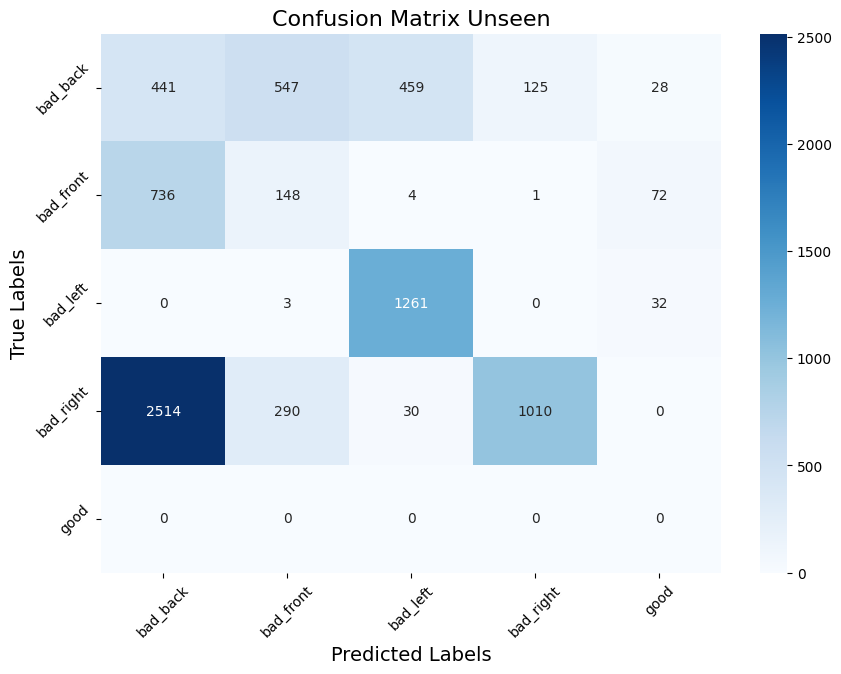

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
Classification Report:
              precision    recall  f1-score   support

    bad_back       0.12      0.28      0.17      1600
   bad_front       0.15      0.15      0.15       961
    bad_left       0.72      0.97      0.83      1296
   bad_right       0.89      0.26      0.41      3844
        good       0.00      0.00      0.00         0

    accuracy                           0.37      7701
   macro avg       0.38      0.33      0.31      7701
weighted avg       0.61      0.37      0.40      7701



In [ ]:
test_unseen_data(rp_bad_dataset_greyscale_med_circle, model, label_encoder)

In [ ]:
# Load all CSV files
file_list = glob.glob("/content/drive/MyDrive/Research/Unseen Data Ellipse/*.csv")  # Update path
exclude_cols = ['Time (s)', 'Label'] # Exclude these from normalization
baseline = 0.6

rp_bad_dataset_greyscale_ellipse = process_all_files(file_list, exclude_cols, baseline)

849/849 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step


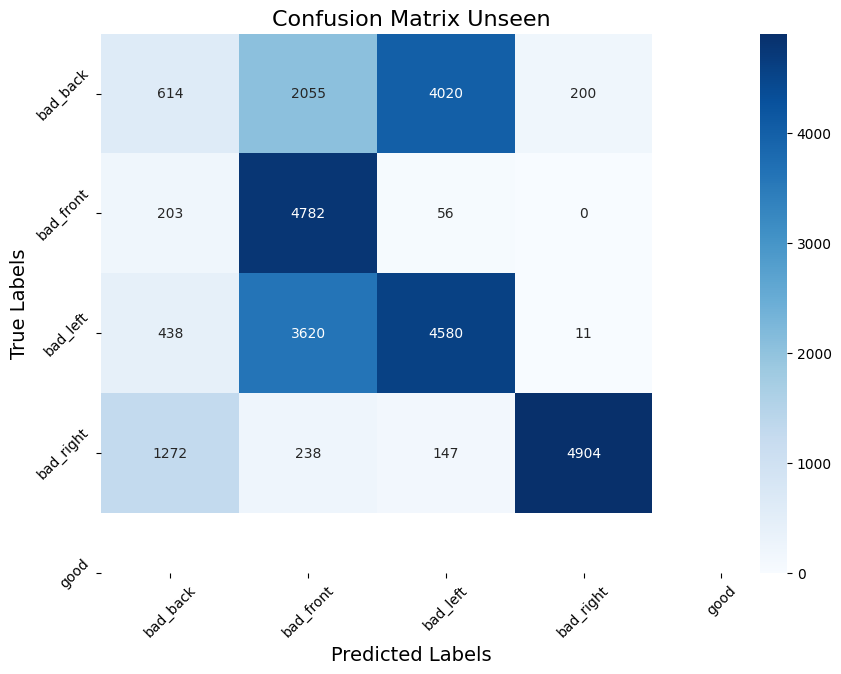

[np.int64(0), np.int64(1), np.int64(2), np.int64(3)]
Classification Report:
              precision    recall  f1-score   support

    bad_back       0.24      0.09      0.13      6889
   bad_front       0.45      0.95      0.61      5041
    bad_left       0.52      0.53      0.52      8649
   bad_right       0.96      0.75      0.84      6561

    accuracy                           0.55     27140
   macro avg       0.54      0.58      0.53     27140
weighted avg       0.54      0.55      0.52     27140



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:2687: UserWarning: labels size, 4, does not match size of target_names, 5
  warnings.warn(


In [ ]:
test_unseen_data(rp_bad_dataset_greyscale_ellipse, model, label_encoder)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping setup
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
  X_train, y_train, epochs=200, batch_size = 32, validation_split=0.2, callbacks=[early_stopping]
)
if history is None:
    raise ValueError("The model training did not return a valid history object.")
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

Epoch 1/200
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 155s 120ms/step - accuracy: 0.3633 - loss: 1.7138 - val_accuracy: 0.5749 - val_loss: 1.0673
Epoch 2/200
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 145s 114ms/step - accuracy: 0.5733 - loss: 1.0195 - val_accuracy: 0.6686 - val_loss: 0.8660
Epoch 3/200
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 143s 113ms/step - accuracy: 0.6695 - loss: 0.8195 - val_accuracy: 0.7531 - val_loss: 0.6837
Epoch 4/200
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 143s 113ms/step - accuracy: 0.7285 - loss: 0.6972 - val_accuracy: 0.7647 - val_loss: 0.6251
Epoch 5/200
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 141s 111ms/step - accuracy: 0.7739 - loss: 0.6022 - val_accuracy: 0.8247 - val_loss: 0.5145
Epoch 6/200
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 140s 111ms/step - accuracy: 0.7879 - loss: 0.5656 - val_accuracy: 0.8130 - val_loss: 0.5026
Epoch 7/200
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 150s 118ms/step - accuracy: 0.8054 - loss: 0.5212 - val_accuracy: 0.8437 - val_loss: 0.4303
Epoch 8/200
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 140s 110ms/s

In [ ]:
from sklearn.metrics import f1_score

# Get test predictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to class labels

f1 = f1_score(y_test, y_pred_classes, average='macro')  # Change 'macro' to other options if needed
print(f1)

397/397 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step
0.9516453727465952


# 500x500 (Jet)

In [ ]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import cv2
from scipy.spatial.distance import pdist, squareform, cdist

def create_rp(exclude_cols, baseline, file_path):
    label = ''

    if file_path.endswith('.csv'):
        df = pd.read_csv(file_path)
        if 'good' in file_path:
            label = 'good'
        elif 'bad' in file_path:
            if 'left' in file_path:
                label = 'bad_left'
            elif 'right' in file_path:
                label = 'bad_right'
            elif 'front' in file_path:
                label = 'bad_front'
            elif 'back' in file_path:
                label = 'bad_back'
            else:
                label = 'bad'
        else:
            label = 'unknown'

        # Find the index of the first row where any sensor value exceeds the baseline
        baseline_idx = df[(df[['F0 (V)', 'F1 (V)', 'F2 (V)', 'F3 (V)',
                               'F4 (V)', 'F5 (V)', 'F6 (V)', 'F7 (V)']] > baseline).any(axis=1)].index[0]

        # Slice the DataFrame from that index onward
        final_df = df.loc[baseline_idx:].reset_index(drop=True)

        # Min-max scaling
        #final_df = min_max_scale(final_df, GLOBAL_MIN, GLOBAL_MAX, exclude_cols)

        # ✅ Fix: Ensure the function returns **two** values
        return final_df, label  # ✅ Make sure to return both

# Extract the data for sensor F0 - 7
def generate_recurrence_matrix(df):
  recurrence_matrices = []
  for i in range(8):
    sensor = i
    sensor_data = df[f'F{i} (V)'].values

    threshold = 0.001  # This may need to be adjusted

    distances = cdist(sensor_data.reshape(-1, 1), sensor_data.reshape(-1, 1), metric='euclidean')

    # Apply threshold to create the recurrence matrix
    recurrence_matrix = np.where(distances < threshold, 1, 0)
    recurrence_matrices.append(recurrence_matrix)
  return recurrence_matrices


def apply_colormap(matrix, cmap='jet'):
    """Apply a colormap and convert to RGB format."""
    # norm_matrix = (matrix - np.min(matrix)) / (np.max(matrix) - np.min(matrix) + 1e-8)  # Normalize to [0,1]
    norm_matrix = (matrix - np.min(matrix)) / (np.max(matrix) - np.min(matrix))
    colormap = plt.get_cmap(cmap)
    colored_matrix = colormap(norm_matrix)[:, :, :3]  # Extract only RGB channels
    return (colored_matrix * 255).astype(np.uint8)  # Convert to 8-bit RGB image

def process_all_files(file_list, exclude_cols, baseline):
    """Process CSVs, generate summed recurrence plots, apply colormap, and store 500x500 sections."""
    dataset = []

    for file_path in file_list:
        final_df, label = create_rp(exclude_cols, baseline, file_path)

        # Generate recurrence matrices for all 8 sensors
        recurrence_matrices = generate_recurrence_matrix(final_df)

        # Sum all recurrence matrices
        combined_matrix = np.sum(recurrence_matrices, axis=0)

        # Apply 'jet' colormap to the summed matrix
        colored_image = apply_colormap(combined_matrix, cmap='jet')

        full_image_size = combined_matrix.shape[0]  # Assuming square matrix
        num_sections = full_image_size // 500

        for i in range(num_sections):
            for j in range(num_sections):
                start_row = i * 500
                start_col = j * 500
                section = colored_image[start_row:start_row + 500, start_col:start_col + 500, :]

                dataset.append({'Image': section, 'Label': label})

    return pd.DataFrame(dataset)

In [ ]:
# Load all CSV files
file_list = glob.glob("/content/drive/MyDrive/Pressure Sensor Maching Learning/Research")  # Update path
exclude_cols = ['Time (s)', 'Label'] # Exclude these from normalization
baseline = 0.6

# Generate the dataset
rp_dataset_500_jet = process_all_files(file_list, exclude_cols, baseline)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np

X = np.array(rp_dataset_500_jet['Image'].tolist())
Y = rp_dataset_500_jet["Label"]

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(Y)
labels_categorical = to_categorical(labels_encoded)

X_train, X_test, y_train, y_test = train_test_split(X, labels_categorical, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3180, 500, 500, 3)
y_train shape: (3180, 5)
X_test shape: (796, 500, 500, 3)
y_test shape: (796, 5)


In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import SeparableConv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Preprocess data
X = np.array(rp_dataset['Image'].tolist())  # Assuming shape (N, 128, 128, 3)
Y = rp_dataset["Label"]

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(Y)
labels_categorical = to_categorical(labels_encoded)

# Hold out 20% as unseen test data
X_temp, X_test, y_temp, y_test = train_test_split(
    X, labels_categorical, test_size=0.2, stratify=labels_encoded, random_state=42
)
y_temp_encoded = np.argmax(y_temp, axis=1)  # For stratified k-fold

# Define model architecture
def build_model():
    model = Sequential()

    # 1st Convolutional Layer (Reduce filters)
    model.add(SeparableConv2D(8, (3, 3), activation='relu', padding='same', input_shape=(500, 500, 3)))
    model.add(MaxPooling2D((2, 2)))  # 250x250

    # 2nd Convolutional Layer
    model.add(SeparableConv2D(16, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))  # 125x125

    # 3rd Convolutional Layer
    model.add(SeparableConv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((4, 4)))  # 31x31 (Larger pooling to reduce size faster)

    # 4th Convolutional Layer
    model.add(SeparableConv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((4, 4)))  # 7x7

    # Global Average Pooling (Reduces params)
    model.add(GlobalAveragePooling2D())

    # Dense layer (Reduced size)
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))

    # Output layer
    model.add(Dense(5, activation='softmax'))


    initial_lr = 0.001
    decay_rate = 0.96
    decay_steps = len(X_train) // 32  # decay every epoch

    lr_schedule = keras.optimizers.schedules.ExponentialDecay(
        initial_lr,
        decay_steps=decay_steps,
        decay_rate=decay_rate,
        staircase=True
    )
    # model = create_dilated_model(num_labels)

    # model.compile(keras.optimizers.SGD(learning_rate=lr_schedule, momentum = .9), loss='categorical_crossentropy', metrics=['accuracy'])
    model.compile(keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Set up K-Fold Cross Validation
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
best_val_accuracy = 0
best_fold = -1

# Cross-validation loop
for fold, (train_idx, val_idx) in enumerate(skf.split(X_temp, y_temp_encoded)):
    print(f"\n--- Fold {fold + 1} ---")

    X_train, X_val = X_temp[train_idx], X_temp[val_idx]
    y_train, y_val = y_temp[train_idx], y_temp[val_idx]

    model = build_model()
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_val, y_val))

    val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
    print(f"Validation Accuracy for fold {fold + 1}: {val_acc * 100:.2f}%")

    if val_acc > best_val_accuracy:
        best_val_accuracy = val_acc
        best_fold = fold + 1
        model.save("best_model.h5")  # Save entire model



--- Fold 1 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_separable_conv.py:104: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 85s 64ms/step - accuracy: 0.3387 - loss: 1.4386 - val_accuracy: 0.6943 - val_loss: 0.8016
Epoch 2/10
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 79s 62ms/step - accuracy: 0.6541 - loss: 0.8402 - val_accuracy: 0.8226 - val_loss: 0.4963
Epoch 3/10
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 78s 61ms/step - accuracy: 0.7793 - loss: 0.5697 - val_accuracy: 0.8395 - val_loss: 0.4244
Epoch 4/10
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 78s 61ms/step - accuracy: 0.8315 - loss: 0.4422 - val_accuracy: 0.8869 - val_loss: 0.3006
Epoch 5/10
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 79s 62ms/step - accuracy: 0.8583 - loss: 0.3762 - val_accuracy: 0.9125 - val_loss: 0.2295
Epoch 6/10
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 81s 63ms/step - accuracy: 0.8759 - loss: 0.3245 - val_accuracy: 0.9110 - val_loss: 0.2468
Epoch 7/10
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 77s 60ms/step - accuracy: 0.8893 - loss: 0.2990 - val_accuracy: 0.9353 - val_loss: 0.1813
Epoch 8/10
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 78s 61ms/step - accuracy: 0.8970 -

Validation Accuracy for fold 1: 93.67%

--- Fold 2 ---
Epoch 1/10
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 82s 60ms/step - accuracy: 0.3145 - loss: 1.4743 - val_accuracy: 0.4239 - val_loss: 1.2355
Epoch 2/10
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 78s 60ms/step - accuracy: 0.4472 - loss: 1.1955 - val_accuracy: 0.6082 - val_loss: 0.8694
Epoch 3/10
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 77s 60ms/step - accuracy: 0.5816 - loss: 0.9427 - val_accuracy: 0.7328 - val_loss: 0.6702
Epoch 4/10
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 76s 59ms/step - accuracy: 0.6382 - loss: 0.8116 - val_accuracy: 0.7582 - val_loss: 0.6002
Epoch 5/10
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 77s 60ms/step - accuracy: 0.6699 - loss: 0.7562 - val_accuracy: 0.7989 - val_loss: 0.5384
Epoch 6/10
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 80s 62ms/step - accuracy: 0.6979 - loss: 0.6967 - val_accuracy: 0.8074 - val_loss: 0.5364
Epoch 7/10
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 79s 62ms/step - accuracy: 0.7275 - loss: 0.6306 - val_accuracy: 0.8569 - val_loss: 0.4042
Epoch 8/10
1286/1286 

# **IGNORE**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SeparableConv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
import keras

model = Sequential()

# 1st Convolutional Layer (Reduce filters)
model.add(SeparableConv2D(8, (3, 3), activation='relu', padding='same', input_shape=(500, 500, 3)))
model.add(MaxPooling2D((2, 2)))  # 250x250

# 2nd Convolutional Layer
model.add(SeparableConv2D(16, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))  # 125x125

# 3rd Convolutional Layer
model.add(SeparableConv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((4, 4)))  # 31x31 (Larger pooling to reduce size faster)

# 4th Convolutional Layer
model.add(SeparableConv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((4, 4)))  # 7x7

# Global Average Pooling (Reduces params)
model.add(GlobalAveragePooling2D())

# Dense layer (Reduced size)
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(5, activation='softmax'))


initial_lr = 0.001
decay_rate = 0.96
decay_steps = len(X_train) // 32  # decay every epoch

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_lr,
    decay_steps=decay_steps,
    decay_rate=decay_rate,
    staircase=True
)
# model = create_dilated_model(num_labels)

# model.compile(keras.optimizers.SGD(learning_rate=lr_schedule, momentum = .9), loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


# Compile
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ separable_conv2d_32                  │ (None, 500, 500, 8)         │              59 │
│ (SeparableConv2D)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 250, 250, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_33                  │ (None, 250, 250, 16)        │             216 │
│ (SeparableConv2D)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 125, 125, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_34                  │ (None, 125, 125, 32)        │             688 │
│ (SeparableConv2D)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_35                  │ (None, 31, 31, 64)          │           2,400 │
│ (SeparableConv2D)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_8           │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,608 (21.91 KB)

 Trainable params: 5,608 (21.91 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 76s 925ms/step - accuracy: 0.2435 - loss: 1.7400 - val_accuracy: 0.2579 - val_loss: 1.5608
Epoch 2/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 75s 940ms/step - accuracy: 0.2960 - loss: 1.5248 - val_accuracy: 0.3145 - val_loss: 1.4423
Epoch 3/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 73s 912ms/step - accuracy: 0.3346 - loss: 1.4318 - val_accuracy: 0.3475 - val_loss: 1.3496
Epoch 4/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 72s 901ms/step - accuracy: 0.3818 - loss: 1.3552 - val_accuracy: 0.3726 - val_loss: 1.3226
Epoch 5/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.3949 - loss: 1.3242 - val_accuracy: 0.4371 - val_loss: 1.2337
Epoch 6/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 73s 909ms/step - accuracy: 0.4007 - loss: 1.2826 - val_accuracy: 0.4371 - val_loss: 1.2018
Epoch 7/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 72s 905ms/step - accuracy: 0.4122 - loss: 1.2655 - val_accuracy: 0.4575 - val_loss: 1.1745
Epoch 8/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 74s 926ms/step - accuracy: 0.4231 - loss: 1.2176 - val

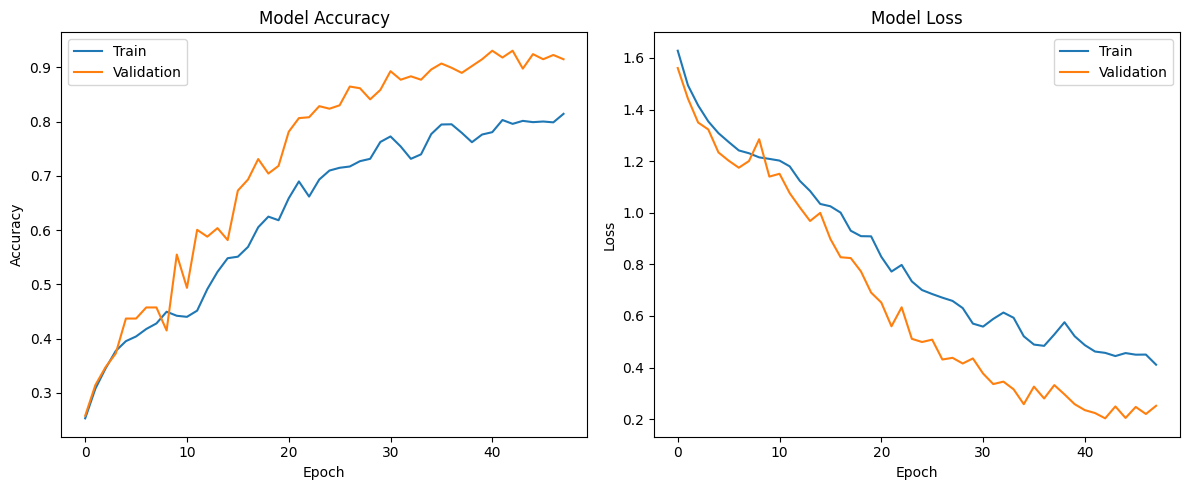

In [ ]:
# with decay

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# # Step 5: Evaluate the Model
# callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights = True)
# history = model.fit(X_train, y_train, epochs=epochs, batch_size = batch_size, validation_split=0.2, callbacks=[callback])
# test_loss, test_acc = model.evaluate(X_test, y_test)


from tensorflow.keras.callbacks import EarlyStopping

# Early stopping setup
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
  X_train, y_train, epochs=200, batch_size = 32, validation_split=0.2, callbacks=[early_stopping]
)
if history is None:
    raise ValueError("The model training did not return a valid history object.")
test_loss, test_acc = model.evaluate(X_test, y_test)

model.save("/content/drive/MyDrive/Research/Models/rp_jet_separable_500_lr.keras")

print(f"Test accuracy: {test_acc}")
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()

Epoch 1/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 77s 943ms/step - accuracy: 0.2315 - loss: 1.6145 - val_accuracy: 0.2484 - val_loss: 1.5409
Epoch 2/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 75s 933ms/step - accuracy: 0.3093 - loss: 1.4436 - val_accuracy: 0.3475 - val_loss: 1.3391
Epoch 3/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 73s 914ms/step - accuracy: 0.3576 - loss: 1.3880 - val_accuracy: 0.3726 - val_loss: 1.3316
Epoch 4/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 74s 920ms/step - accuracy: 0.3374 - loss: 1.3546 - val_accuracy: 0.3852 - val_loss: 1.2877
Epoch 5/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 74s 928ms/step - accuracy: 0.3756 - loss: 1.3085 - val_accuracy: 0.3632 - val_loss: 1.2458
Epoch 6/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 73s 910ms/step - accuracy: 0.4206 - loss: 1.2477 - val_accuracy: 0.4450 - val_loss: 1.1896
Epoch 7/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 73s 909ms/step - accuracy: 0.4579 - loss: 1.1775 - val_accuracy: 0.4654 - val_loss: 1.1112
Epoch 8/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 74s 927ms/step - accuracy: 0.5057 - loss: 1.1230 - 

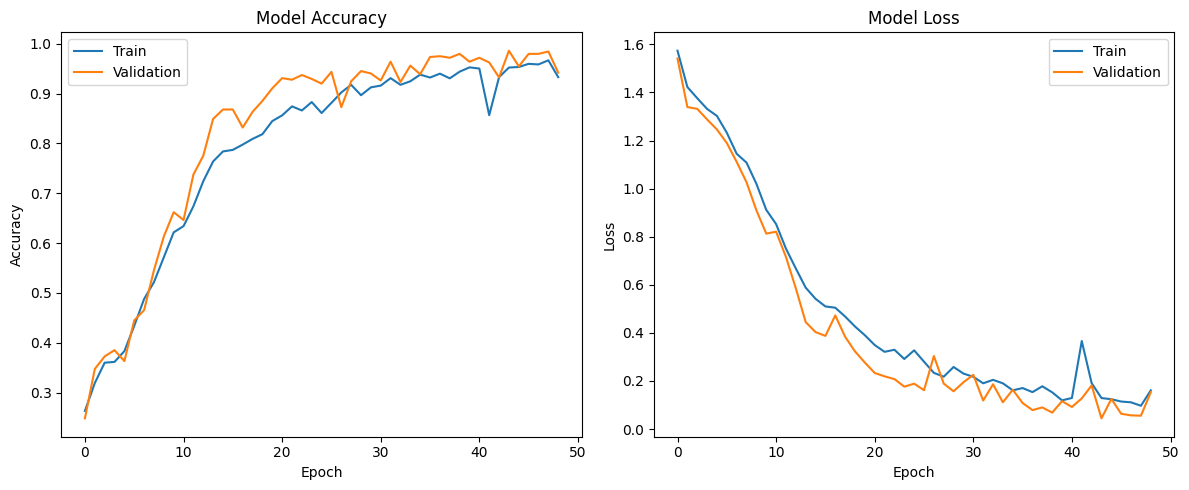

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# # Step 5: Evaluate the Model
# callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights = True)
# history = model.fit(X_train, y_train, epochs=epochs, batch_size = batch_size, validation_split=0.2, callbacks=[callback])
# test_loss, test_acc = model.evaluate(X_test, y_test)


from tensorflow.keras.callbacks import EarlyStopping

# Early stopping setup
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
  X_train, y_train, epochs=200, batch_size = 32, validation_split=0.2, callbacks=[early_stopping]
)
if history is None:
    raise ValueError("The model training did not return a valid history object.")
test_loss, test_acc = model.evaluate(X_test, y_test)

model.save("/content/drive/MyDrive/Research/Models/rp_jet_separable_500.keras")

print(f"Test accuracy: {test_acc}")
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

y_pred_prob = model.predict(X_test.reshape(-1, 500, 500, 3))  # Predicted probabilities
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)
labels = label_encoder.classes_
print(labels)

# Confusion Matrix
confusion = confusion_matrix(y_true, y_pred)

# Classification Report
report = classification_report(y_true, y_pred, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)

# Plotting the confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Adding labels and title
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

# Rotate the x and y labels
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.show()

ValueError: cannot reshape array of size 632045568 into shape (500,500,3)

# UNSEEN TESTING

In [ ]:
# defining test_unseen_data

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform, cdist
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

def test_unseen_data(df, model, label_encoder):

      # Prepare the unseen data
      X_unseen = np.array(df['Image'].tolist())
      Y_unseen = df["Label"]

      # Encode and categorize the labels
      labels_encoded = label_encoder.transform(Y_unseen)
      labels_categorical = to_categorical(labels_encoded)

      # Predict using the model

      y_pred_prob = model.predict(X_unseen.reshape(-1, 500, 500, 3))
      y_pred = np.argmax(y_pred_prob, axis=1)
      y_true = np.argmax(labels_categorical, axis=1)


      labels_guessed = list(set(np.concatenate((y_pred, y_true))))

      # Confusion Matrix
      confusion = confusion_matrix(y_true, y_pred)

      # Plot Confusion Matrix
      plt.figure(figsize=(10, 7))
      sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
      plt.title("Confusion Matrix Unseen", fontsize=16)
      plt.xlabel('Predicted Labels', fontsize=14)
      plt.ylabel('True Labels', fontsize=14)
      plt.xticks(rotation=45)
      plt.yticks(rotation=45)
      plt.show()

      # Classification Report
      print(labels_guessed)
      report = classification_report(y_true, y_pred, labels=labels_guessed, target_names=label_encoder.classes_, zero_division=0)
      print("Classification Report:")
      print(report)

In [ ]:
# Load all CSV files

# unseen data ellipse
# Unseen Data Medium Circle

# preprocesses

file_list = glob.glob("/content/drive/MyDrive/Research/Unseen Data Ellipse/*.csv")  # Update path
exclude_cols = ['Time (s)', 'Label'] # Exclude these from normalization
baseline = 0.6

rp_bad_dataset_ellipse = process_all_files(file_list, exclude_cols, baseline)

53/53 ━━━━━━━━━━━━━━━━━━━━ 16s 295ms/step


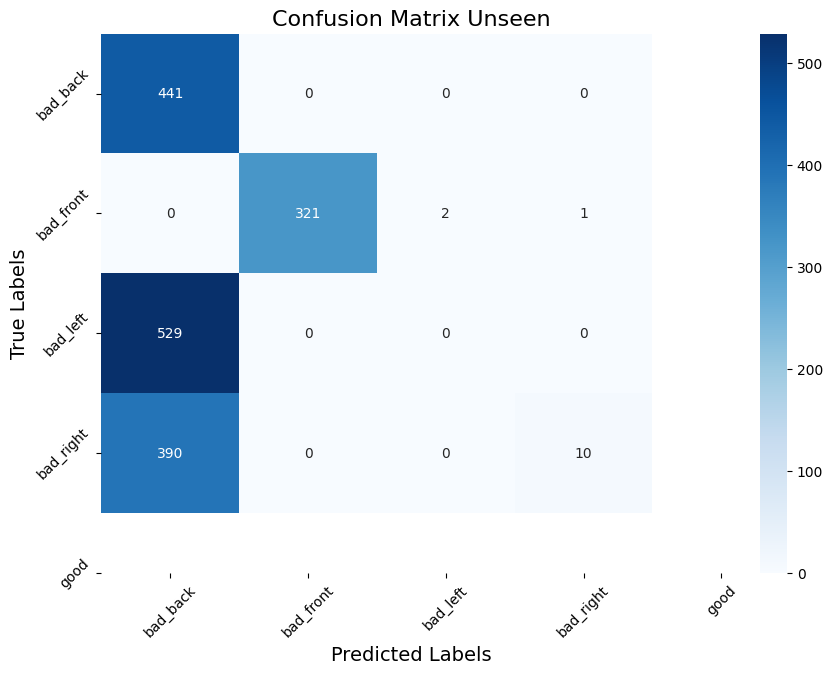

[np.int64(0), np.int64(1), np.int64(2), np.int64(3)]
Classification Report:
              precision    recall  f1-score   support

    bad_back       0.32      1.00      0.49       441
   bad_front       1.00      0.99      1.00       324
    bad_left       0.00      0.00      0.00       529
   bad_right       0.91      0.03      0.05       400

    accuracy                           0.46      1694
   macro avg       0.56      0.50      0.38      1694
weighted avg       0.49      0.46      0.33      1694



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:2687: UserWarning: labels size, 4, does not match size of target_names, 5
  warnings.warn(


In [ ]:
test_unseen_data(rp_bad_dataset_ellipse, model, label_encoder)

In [ ]:
#Unseen
# Load all CSV files
file_list = glob.glob("/content/drive/MyDrive/Pressure Sensor Maching Learning/Unseen Data Medium Circle/*.csv")  # Update path
exclude_cols = ['Time (s)', 'Label'] # Exclude these from normalization
baseline = 0.6

rp_bad_dataset_med_circle = process_all_files(file_list, exclude_cols, baseline)

15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 281ms/step


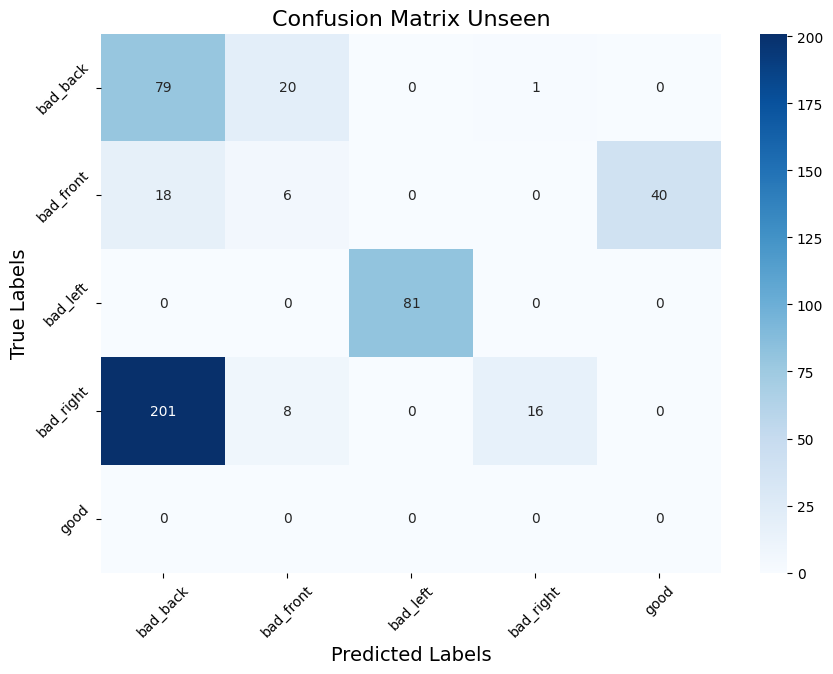

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
Classification Report:
              precision    recall  f1-score   support

    bad_back       0.27      0.79      0.40       100
   bad_front       0.18      0.09      0.12        64
    bad_left       1.00      1.00      1.00        81
   bad_right       0.94      0.07      0.13       225
        good       0.00      0.00      0.00         0

    accuracy                           0.39       470
   macro avg       0.48      0.39      0.33       470
weighted avg       0.70      0.39      0.34       470



In [ ]:
test_unseen_data(rp_bad_dataset_med_circle, model, label_encoder)

# 500x500

In [ ]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform, cdist

def create_rp(exclude_cols, baseline, file_path):
    """Load CSV, assign label, normalize, and return processed DataFrame."""
    label = ''

    if file_path.endswith('.csv'):
        df = pd.read_csv(file_path)
        if 'good' in file_path:
            df['Label'] = 'good'
            label = 'good'
        elif 'bad' in file_path:
            if 'left' in file_path:
                df['Label'] = 'bad_left'
                label = 'bad_left'
            elif 'right' in file_path:
                df['Label'] = 'bad_right'
                label = 'bad_right'
            elif 'front' in file_path:
                df['Label'] = 'bad_front'
                label = 'bad_front'
            elif 'back' in file_path:
                df['Label'] = 'bad_back'
                label = 'bad_back'
            else:
                df['Label'] = 'bad'
                label = 'bad'
        else:
            df['Label'] = 'unknown'
            label = 'unknown'

        # Find index where any sensor exceeds baseline
        baseline_idx = df[(df[['F0 (V)', 'F1 (V)', 'F2 (V)', 'F3 (V)', 'F4 (V)', 'F5 (V)', 'F6 (V)', 'F7 (V)']] > baseline).any(axis=1)].index[0]
        final_df = df.loc[baseline_idx:].reset_index(drop=True)

        # Normalize data
        #final_df = min_max_scale(final_df, GLOBAL_MIN, GLOBAL_MAX, exclude_cols)

        return final_df, label

# Extract the data for sensor F0 - 7
def generate_recurrence_matrix(df):
  recurrence_matrices = []
  for i in range(8):
    sensor = i
    sensor_data = df[f'F{i} (V)'].values

    threshold = 0.001  # This may need to be adjusted

    distances = cdist(sensor_data.reshape(-1, 1), sensor_data.reshape(-1, 1), metric='euclidean')

    # Apply threshold to create the recurrence matrix
    recurrence_matrix = np.where(distances < threshold, 1, 0)
    recurrence_matrices.append(recurrence_matrix)
  return recurrence_matrices

def plot_section(matrix, start_row, start_col, section_size=500):
    """Extract a 500x500 section from the matrix."""
    return matrix[start_row:start_row + section_size, start_col:start_col + section_size]

def process_all_files(file_list, exclude_cols, baseline):
    """Process multiple CSVs, generate recurrence plots, and store sections in a DataFrame."""
    dataset = []

    for file_path in file_list:
        final_df, label = create_rp(exclude_cols, baseline, file_path)

        # Create recurrence plots for each sensor
        recurrence_matrices = generate_recurrence_matrix(final_df)
        combined_matrix = np.sum(recurrence_matrices, axis=0)

        # normalize matrix
        combined_matrix = (combined_matrix - np.min(combined_matrix)) / (np.max(combined_matrix) - np.min(combined_matrix))

        full_image_size = combined_matrix.shape[0]
        num_sections = full_image_size // 500

        for i in range(num_sections):
            for j in range(num_sections):
                start_row = i * 500
                start_col = j * 500
                section = plot_section(combined_matrix, start_row, start_col)
                dataset.append({'Image': section, 'Label': label})

    return pd.DataFrame(dataset)

In [ ]:
# Load all CSV files
file_list = glob.glob("/content/drive/MyDrive/Research/*.csv")  # Update path
exclude_cols = ['Time (s)', 'Label'] # Exclude these from normalization
baseline = 0.6

# Generate the dataset
rp_dataset_500_grey = process_all_files(file_list, exclude_cols, baseline)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np

X = np.array(rp_dataset_500_grey['Image'].tolist())
Y = rp_dataset_500_grey["Label"]

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(Y)
labels_categorical = to_categorical(labels_encoded)

X_train, X_test, y_train, y_test = train_test_split(X, labels_categorical, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3180, 500, 500)
y_train shape: (3180, 5)
X_test shape: (796, 500, 500)
y_test shape: (796, 5)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SeparableConv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout

model = Sequential()

# 1st Convolutional Layer (Reduce filters)
model.add(SeparableConv2D(8, (3, 3), activation='relu', padding='same', input_shape=(500, 500, 1)))
model.add(MaxPooling2D((2, 2)))  # 250x250

# 2nd Convolutional Layer
model.add(SeparableConv2D(16, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))  # 125x125

# 3rd Convolutional Layer
model.add(SeparableConv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((4, 4)))  # 31x31 (Larger pooling to reduce size faster)

# 4th Convolutional Layer
model.add(SeparableConv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((4, 4)))  # 7x7

# Global Average Pooling (Reduces params)
model.add(GlobalAveragePooling2D())

# Dense layer (Reduced size)
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(5, activation='softmax'))

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_separable_conv.py:104: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ separable_conv2d (SeparableConv2D)   │ (None, 500, 500, 8)         │              25 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 250, 250, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_1 (SeparableConv2D) │ (None, 250, 250, 16)        │             216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 125, 125, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_2 (SeparableConv2D) │ (None, 125, 125, 32)        │             688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_3 (SeparableConv2D) │ (None, 31, 31, 64)          │           2,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,574 (21.77 KB)

 Trainable params: 5,574 (21.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 71s 853ms/step - accuracy: 0.2652 - loss: 1.6033 - val_accuracy: 0.2437 - val_loss: 1.5998
Epoch 2/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 68s 851ms/step - accuracy: 0.2667 - loss: 1.5943 - val_accuracy: 0.2437 - val_loss: 1.5953
Epoch 3/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 66s 826ms/step - accuracy: 0.2722 - loss: 1.5840 - val_accuracy: 0.3270 - val_loss: 1.5044
Epoch 4/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.3487 - loss: 1.4572 - val_accuracy: 0.3994 - val_loss: 1.3523
Epoch 5/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 67s 835ms/step - accuracy: 0.3727 - loss: 1.3888 - val_accuracy: 0.3994 - val_loss: 1.3486
Epoch 6/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 64s 804ms/step - accuracy: 0.3897 - loss: 1.3668 - val_accuracy: 0.3962 - val_loss: 1.3370
Epoch 7/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 65s 810ms/step - accuracy: 0.3807 - loss: 1.3622 - val_accuracy: 0.3852 - val_loss: 1.3335
Epoch 8/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 64s 802ms/step - accuracy: 0.4141 - loss: 1.3600 - val

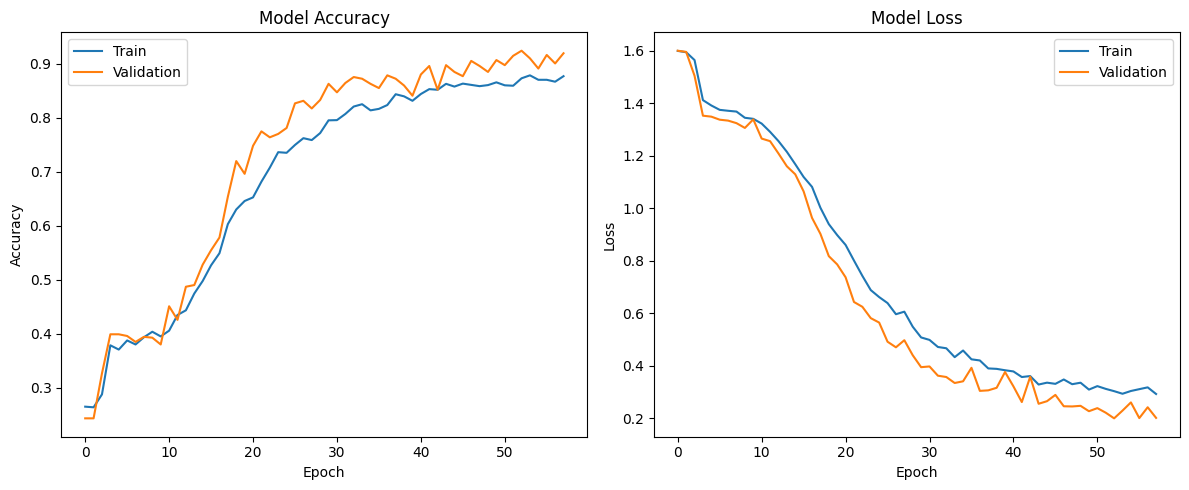

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# # Step 5: Evaluate the Model
# callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights = True)
# history = model.fit(X_train, y_train, epochs=epochs, batch_size = batch_size, validation_split=0.2, callbacks=[callback])
# test_loss, test_acc = model.evaluate(X_test, y_test)


from tensorflow.keras.callbacks import EarlyStopping

# Early stopping setup
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
  X_train, y_train, epochs=200, batch_size = 32, validation_split=0.2, callbacks=[early_stopping]
)
if history is None:
    raise ValueError("The model training did not return a valid history object.")
test_loss, test_acc = model.evaluate(X_test, y_test)

model.save("/content/drive/MyDrive/Research/Models/rp_grey_separable_500.keras")

print(f"Test accuracy: {test_acc}")
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()

25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 250ms/step
['bad_back' 'bad_front' 'bad_left' 'bad_right' 'good']
Classification Report:
              precision    recall  f1-score   support

    bad_back       0.92      0.84      0.88       197
   bad_front       0.93      0.95      0.94       159
    bad_left       0.85      0.84      0.84       157
   bad_right       0.96      0.97      0.97       140
        good       0.89      0.97      0.93       143

    accuracy                           0.91       796
   macro avg       0.91      0.92      0.91       796
weighted avg       0.91      0.91      0.91       796



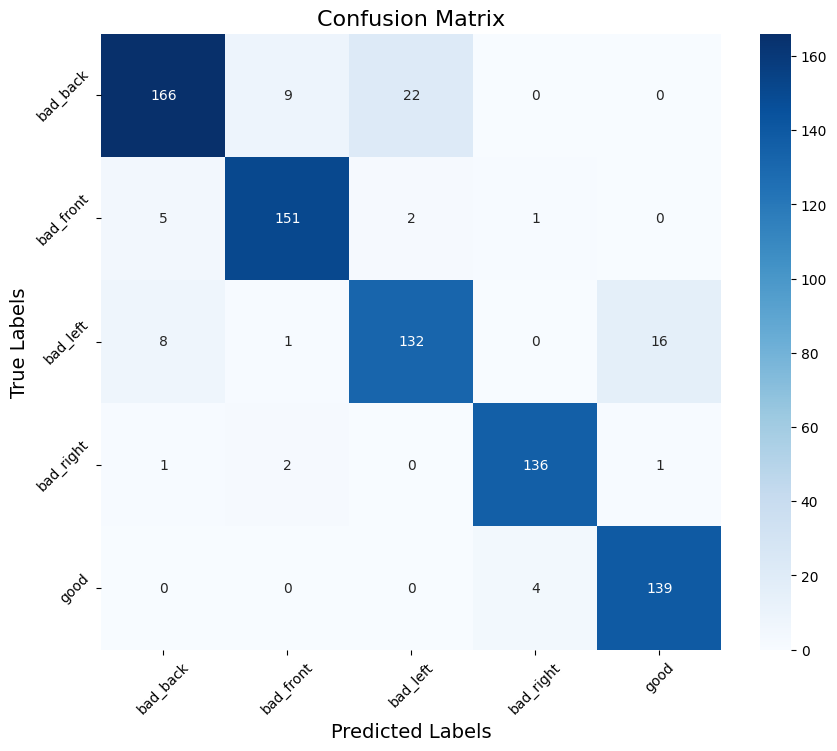

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

y_pred_prob = model.predict(X_test.reshape(-1, 500, 500, 1))  # Predicted probabilities
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)
labels = label_encoder.classes_
print(labels)

# Confusion Matrix
confusion = confusion_matrix(y_true, y_pred)

# Classification Report
report = classification_report(y_true, y_pred, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)

# Plotting the confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Adding labels and title
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

# Rotate the x and y labels
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
# Load all CSV files
file_list = glob.glob("/content/drive/MyDrive/Research/Unseen Data Ellipse/*.csv")  # Update path
exclude_cols = ['Time (s)', 'Label'] # Exclude these from normalization
baseline = 0.6

rp_bad_dataset_greyscale_ellipse = process_all_files(file_list, exclude_cols, baseline)

53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 245ms/step


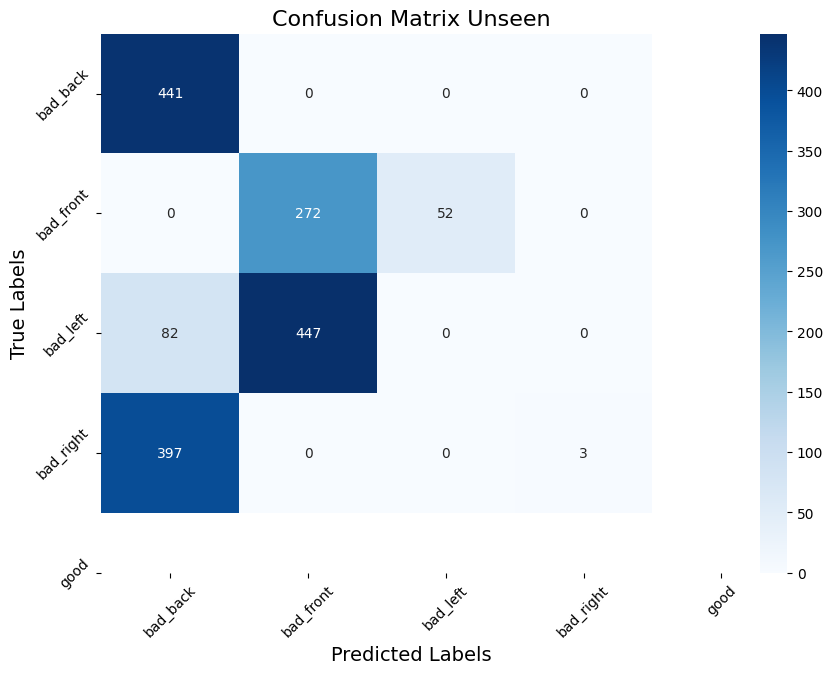

[np.int64(0), np.int64(1), np.int64(2), np.int64(3)]
Classification Report:
              precision    recall  f1-score   support

    bad_back       0.48      1.00      0.65       441
   bad_front       0.38      0.84      0.52       324
    bad_left       0.00      0.00      0.00       529
   bad_right       1.00      0.01      0.01       400

    accuracy                           0.42      1694
   macro avg       0.46      0.46      0.30      1694
weighted avg       0.43      0.42      0.27      1694



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:2687: UserWarning: labels size, 4, does not match size of target_names, 5
  warnings.warn(


In [ ]:
test_unseen_data(rp_bad_dataset_greyscale_ellipse, model, label_encoder)

In [ ]:
#Unseen
# Load all CSV files
file_list = glob.glob("/content/drive/MyDrive/Pressure Sensor Maching Learning/Unseen Data Medium Circle/*.csv")  # Update path
exclude_cols = ['Time (s)', 'Label'] # Exclude these from normalization
baseline = 0.6

rp_bad_dataset_greyscale_med_circle = process_all_files(file_list, exclude_cols, baseline)

15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 239ms/step


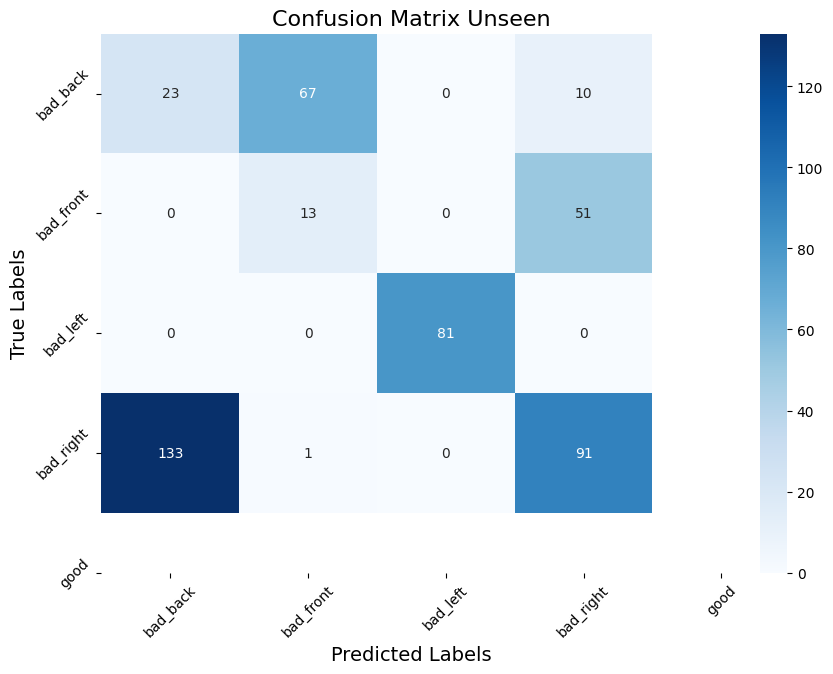

[np.int64(0), np.int64(1), np.int64(2), np.int64(3)]
Classification Report:
              precision    recall  f1-score   support

    bad_back       0.15      0.23      0.18       100
   bad_front       0.16      0.20      0.18        64
    bad_left       1.00      1.00      1.00        81
   bad_right       0.60      0.40      0.48       225

    accuracy                           0.44       470
   macro avg       0.48      0.46      0.46       470
weighted avg       0.51      0.44      0.47       470



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:2687: UserWarning: labels size, 4, does not match size of target_names, 5
  warnings.warn(


In [ ]:
test_unseen_data(rp_bad_dataset_greyscale_med_circle, model, label_encoder)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform, cdist
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

def test_unseen_data(df, model, label_encoder):

      # Prepare the unseen data
      X_unseen = np.array(df['Image'].tolist())
      Y_unseen = df["Label"]

      # Encode and categorize the labels
      labels_encoded = label_encoder.transform(Y_unseen)
      labels_categorical = to_categorical(labels_encoded)

      # Predict using the model

      y_pred_prob = model.predict(X_unseen.reshape(-1, 128, 128, 3))
      y_pred = np.argmax(y_pred_prob, axis=1)
      y_true = np.argmax(labels_categorical, axis=1)


      labels_guessed = list(set(np.concatenate((y_pred, y_true))))

      # Confusion Matrix
      confusion = confusion_matrix(y_true, y_pred)

      # Plot Confusion Matrix
      plt.figure(figsize=(10, 7))
      sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
      plt.title("Confusion Matrix Unseen", fontsize=16)
      plt.xlabel('Predicted Labels', fontsize=14)
      plt.ylabel('True Labels', fontsize=14)
      plt.xticks(rotation=45)
      plt.yticks(rotation=45)
      plt.show()

      # Classification Report
      print(labels_guessed)
      report = classification_report(y_true, y_pred, labels=labels_guessed, target_names=label_encoder.classes_, zero_division=0)
      print("Classification Report:")
      print(report)

402/402 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step
['bad_back' 'bad_front' 'bad_left' 'bad_right' 'good']
Classification Report:
              precision    recall  f1-score   support

    bad_back       0.97      0.95      0.96      3332
   bad_front       0.91      0.98      0.94      2493
    bad_left       0.96      0.87      0.92      2579
   bad_right       0.95      0.92      0.94      2359
        good       0.89      0.97      0.93      2096

    accuracy                           0.94     12859
   macro avg       0.94      0.94      0.94     12859
weighted avg       0.94      0.94      0.94     12859



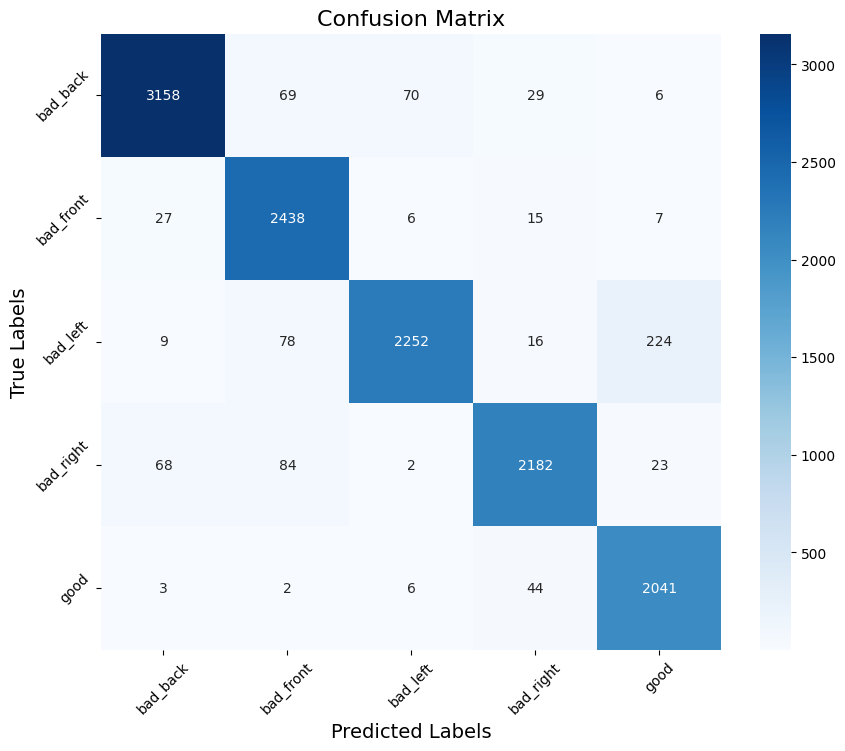

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import keras

model = keras.models.load_model('/content/best_model.h5')


y_pred_prob = model.predict(X_test.reshape(-1, 128, 128, 3))  # Predicted probabilities
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)
labels = label_encoder.classes_
print(labels)

# Confusion Matrix
confusion = confusion_matrix(y_true, y_pred)

# Classification Report
report = classification_report(y_true, y_pred, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)

# Plotting the confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Adding labels and title
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

# Rotate the x and y labels
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
# Load all CSV files
file_list = glob.glob("/content/drive/MyDrive/Research/Unseen Data Medium Circle/*.csv")  # Update path
exclude_cols = ['Time (s)', 'Label'] # Exclude these from normalization
baseline = 0.6

rp_bad_dataset_greyscale_ellipse = process_all_files(file_list, exclude_cols, baseline)

241/241 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step


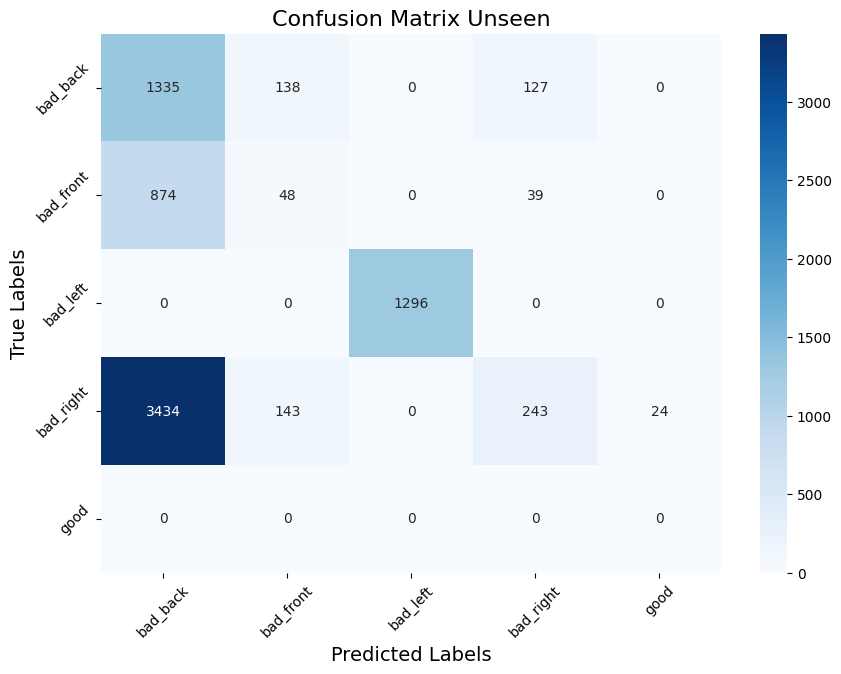

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
Classification Report:
              precision    recall  f1-score   support

    bad_back       0.24      0.83      0.37      1600
   bad_front       0.15      0.05      0.07       961
    bad_left       1.00      1.00      1.00      1296
   bad_right       0.59      0.06      0.11      3844
        good       0.00      0.00      0.00         0

    accuracy                           0.38      7701
   macro avg       0.40      0.39      0.31      7701
weighted avg       0.53      0.38      0.31      7701



In [ ]:
test_unseen_data(rp_bad_dataset_greyscale_ellipse, model, label_encoder)

241/241 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step


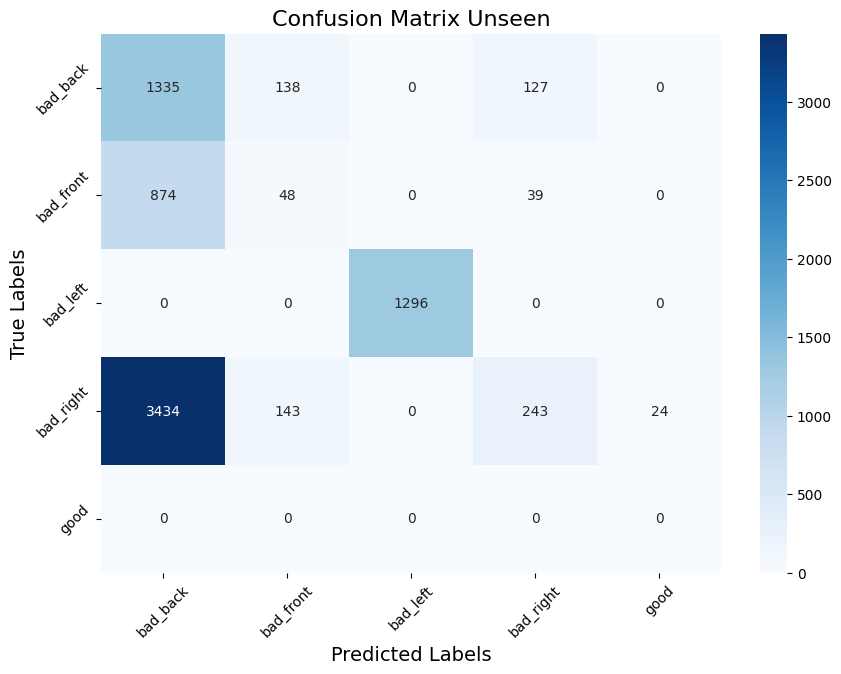

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
Classification Report:
              precision    recall  f1-score   support

    bad_back       0.24      0.83      0.37      1600
   bad_front       0.15      0.05      0.07       961
    bad_left       1.00      1.00      1.00      1296
   bad_right       0.59      0.06      0.11      3844
        good       0.00      0.00      0.00         0

    accuracy                           0.38      7701
   macro avg       0.40      0.39      0.31      7701
weighted avg       0.53      0.38      0.31      7701



In [ ]:
test_unseen_data(rp_bad_dataset_greyscale_ellipse, model, label_encoder)